# **Background / Latar Belakang**

New York City Taxi and Limousine Commission (TLC),yang dibentuk pada tahun 1971, adalah lembaga yang bertanggung jawab atas lisensi dan regulasi taksi Medallion (Kuning) Kota New York, kendaraan sewa (layanan dasar komunitas, mobil hitam, dan limusin mewah), van komuter, dan kendaraan paratransit.

TLC berdiri dari zaman dimana teknologi belum banyak dimanfaatkan dalam kehidupan sehari-hari hingga bertahan di era modern seperti ini, dimana teknologi banyak sekali dimanfaatkan dalam kehidupan sehari-hari. Penggunaan teknologi pun diterapkan TLC pada `trip type`. Namun fenomenanya tingginya frekuensi pada salah satu `trip type` disuatu wilayah, tidak berpengaruh terhadap besarnya `rata-rata total amount`.

# **Problem Statement / Pernyataan Masalah**

Tingginya frekuensi pada salah satu `trip type`, tidak berpengaruh terhadap besarnya `rata-rata total amount`.

Trip type memiliki 2 tipe perjalanan, yaitu :
<br>`1 = Street-hail` : Tipe perjalanan ini penumpang memberhentikan taxi dengan cara angkat tangan dengan artian bahwa penumpang ingin menaiki taxi.

<br>`2 = Dispatch` : Tipe perjalan ini penumpang menggunakan layanan taxi yang diatur melalui panggilan telepon atau aplikasi pemesanan taxi.

Wilayah pada perjalanan taxi di TLC terbagi 6 wilayah, yaitu:
<br>1. Brooklyn
<br>2. Bronx
<br>3. EWR (Newark Liberty International Airport)
<br>4. Manhattan
<br>5. Staten Island
<br>6. Queens

# **Goal / Tujuan**
Dengan perusahaan dapat menganalisa keterkaitan `trip type` pada setiap wilayah dengan `rata rata total amount`, perusahaan dapat memiliki strategi bisnis terupdate dengan menyesuaikan fenomena real yang didapatkan.

# **Data**
Analisa ini menggunakan dataframe New York City TLC Trip Record.
Dataframe yang digunakan dapat di akses [disini](https://drive.google.com/drive/folders/1NYHIL-RgVPW-HONz4pdzlcbIChF-c37N?usp=drive_link).

## Import Libraries
Untuk menganalisa pernyataan masalah berdasarkan dataframe New York City TLC Trip Record dibutuhkan libraries. Berikut libraries yang digunakan :

In [78]:
import pandas as pd 
import numpy as np 

# Libary Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from scipy import stats

## Uraian Kolom
Dataset ini berisi informasi mengenai New York City Trip. Kolom - kolom yang mendukung dataframe ini terdiri dari [**`'VendorID'`, `'lpep_pickup_datetime'`, `'lpep_dropoff_datetime'`, `'Passenger_count'`, `'Trip_distance'`, `'PULocationID '`, `'DOLocationID'`, `'RateCodeID'`, `'Store_and_fwd_flag'`, `'Payment_type'`, `'Fare_amount'`, `'MTA_tax'`, `'Improvement_surcharge'`, `'Tip_amount'`, `'Tolls_amount'`, `'Total_amount'`, `'Trip_type'`, `'extra'`,`'ehail_fee'`,`'congestion_surcharge'`**]. 
<br>
<br>
Agar memahami setiap kolom - kolom yang terdapat pada dataset, berikut uraian kolom :
1. `VendorID`
<br>Kode LPEP (Local Public Enhancement Program) sebagai penyedia data perjalanan
<br>1 = Creative Mobile Technologies, LLC. <br> 2 = VeriFone Inc.

2. `lpep_pickup_datetime` 
<br>Tanggal dan waktu ketika perjalanan aktif (Penjemputan)
<br>YYYYMMDD hh:mm:ss

3. `lpep_dropoff_datetime`
<br>Tanggal dan waktu ketika tidak dalam perjalanan aktif (Penurunan) 
<br>YYYYMMDD hh:mm:ss

4. `Passenger_count` 
<br>Jumlah penumpang di dalam kendaraan. Nilai kolom ini adalah nilai yang dimasukkan oleh driver.

5. `Trip_distance`
<br>Jarak perjalanan yang telah berlalu dalam mil dilaporkan oleh argometer.

6. `PULocationID`
<br>Zona Taksi TLC di mana Argometer digunakan.

7. `DOLocationID`
<br>Zona Taksi TLC di mana Argometer dimatikan.

8. `RateCodeID`
<br>Kode tarif akhir berlaku di akhir perjalanan.
<br>1 = Standard rate (Tarif standar untuk perjalanan dalam kota)
<br>2 = JFK (Tarif untuk perjalanan dari/ke airport international John F. Kennedy)
<br>3 = Newark (Tarif untuk perjalanan dari/ke airport international Newark)
<br>4 = Nassau or Westchester (Tarif untuk perjalanan ke Nassau atau Westchester)
<br>5 = Negotiated fare (Tarif yang Dinegosiasikan sebelumnya antara penyedia layanan dan penumpang. Tarif ini mungkin berlaku untuk perjalanan khusus atau perjanjian bisnis tertentu.)
<br>6 = Group ride (Tarif ini diterapkan ketika penumpang menggunakan layanan perjalanan kelompok, di mana beberapa penumpang bersama-sama melakukan perjalanan dengan tujuan yang sama atau searah.)

9. `Store_and_fwd_flag`
<br>Tanda catatan perjalanan disimpan dalam memori kendaraan sebelum dikirimkan ke penyedia layanan (vendor), yang dikenal sebagai "store and forward," karena kendaraan tidak memiliki koneksi ke server.
<br>Y = store and forward trip (Catatan perjalanan disimpan dalam memori kendaraan sebelum dikirimkan ke penyedia layanan.)
<br>N = not a store and forward trip (Catatan perjalanan tidak disimpan dalam memori kendaraan sebelum dikirimkan ke penyedia layanan.)

10. `Payment_type`
<br>Kode numerik yang menandakan cara penumpang membayar untuk perjalanan.
<br>1 = Credit Card (Kartu Kredit)
<br>2 = Cash (Tunai)
<br>3 = No charge (Tanpa Biaya)
<br>4 = Dispute (Ketidaksepakatan terkait pembayaran perjalanan)
<br>5 = Unknown (Pembayaran perjalanan tidak diketahui atau tidak tersedia)
<br>6 = Voided trip (Perjalanan dibatalkan)

11. `Fare_amount`
<br>Tarif waktu dan jarak dihitung oleh meter. Ekstra Lain-lain Ekstra dan biaya tambahan. Saat ini, ini hanya mencakup $0,50 dan $1 biaya jam dan semalam.

12. `MTA_tax` 
<br>Pajak MTA $0,50 yang dipicu secara otomatis berdasarkan pada tarif meteran yang digunakan.

13. `Improvement_surcharge`
<br>Biaya tambahan sebesar $0.30 yang dikenakan pada perjalanan yang dipesan secara langsung (hail trips) pada saat bendera (flag) dikibarkan atau pada saat penumpang naik atau turun dari kendaraan. Biaya tambahan ini dikenal sebagai "improvement surcharge" atau biaya peningkatan, dan dimulai diterapkan pada tahun 2015.

14. `Tip_amount`
<br>Secara otomatis diisi untuk tips yang diberikan dengan kartu kredit. Tidak mencakup tips yang diberikan dengan uang tunai.

15. `Tolls_amount`
<br>Jumlah total semua tol yang dibayarkan dalam perjalanan.

16. `Total_amount`
<br>Jumlah total yang dibebankan kepada penumpang. Tidak termasuk tip uang tunai
<br>Total amount diperoleh dari menjumlahkan biaya `Fare_amount`, `MTA_tax` , `Improvement_surcharge`, `Tip_amount`, `Tolls_amount`, `Extra`, dan `Congestion_surcharge`.

17. `Trip_type`
<br>Kode yang menunjukkan apakah perjalanan tersebut dimulai melalui penjemputan di jalan (street hail) atau melalui Dispatch (Pengiriman Panggilan) yang diberikan secara otomatis berdasarkan tarif yang dihitung oleh meter, namun bisa diubah oleh pengemudi.
<br>1 = Street-hail (Penjemputan di jalan)
<br>2 = Dispatch (Pengiriman Panggilan/Aplikasi tertentu)

18. `extra`
<br>Biaya tambahan yang mungkin dikenakan pada perjalanan taksi di luar biaya dasar, seperti biaya tambahan untuk perjalanan pada jam sibuk atau biaya tambahan untuk perjalanan ke tujuan tertentu.

19. `ehail_fee`
<br>Biaya tambahan yang dikenakan ketika perjalanan diatur melalui aplikasi atau platform e-hail

20. `congestion_surcharge`
<br>Biaya tambahan yang dikenakan pada perjalanan taksi sebagai tanggapan terhadap kemacetan lalu lintas di daerah-daerah tertentu.
<br>Biaya tambahan ini diterapkan pada perjalanan taksi yang melintasi daerah-daerah yang ditentukan sebagai zona kemacetan, terutama di kawasan pusat kota yang padat.

## Data Overall

In [79]:
# Dataframe
df = pd.read_csv('NYC TLC Trip Record.csv')

# The first five lines
display(df.head())

# The last five lines
display(df.tail())

C:\Users\HP\AppData\Local\Temp\ipykernel_10904\1245843026.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NYC TLC Trip Record.csv')


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


# **Data Understanding**
Sebelum melakukan analisis yang lebih mendalam, langkah yang perlu dilakukan yaitu **data understanding**. **Data understanding** adalah tahap awal dalam proses analisis data yang bertujuan untuk memahami secara mendalam karakteristik dan struktur data yang akan dianalisis. Dari proses ini, kita akan mengetahui anomali-anomali apa saja yang terdapat di dalam dataset.

## Data Types


In [80]:
print(f'Jumlah baris dan kolom di dataframe df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataframe df adalah (68211, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 

Dari 20 variable diatas, terdapat 2 variable yang tipe datanya belum sesuai, yaitu :  <br>`'lpep_pickup_datetime'` -> tipe data `object`
<br>`'lpep_dropoff_datetime'` -> tipe data `object`
<br>Seharusnya `'lpep_pickup_datetime'` dan `'lpep_dropoff_datetime'` bertipe data `datetime`.

## NUNIQUE & UNIQUE Data
**NUNIQUE** : Menampilkan jumlah nilai unik atau berbeda dalam sebuah dataset.
<br>**UNIQUE Data** : Menampilkan nilai unik atau berbeda dalam dataframe tanpa adanya duplikat.

In [81]:
# Menampilkan jumlah nilai unik dan nilai unik pada setiap kolom yang ada :
pd.set_option('display.max_colwidth', 1)
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tableUnique = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tableUnique

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 2

Table unique diatas menunjukkan terdapat 7 kolom yang memiliki nilai nan (nilai tidak ada atau kosong). Kolom tersebut sebagai berikut :
<br>1. `store_and_fwd_flag`
<br>2. `RatecodeID`
<br>3. `passenger_count`
<br>4. `ehail_fee`
<br>5. `payment_type`
<br>6. `trip_type`
<br>7. `congestion_surcharge`

## Missing Values

### Jumlah Missing Value
Setelah mengetahui terdapat nilai nan atau kosong pada dataframe ini, kita perlu melihat jumlah data nilai nan. Untuk keperluan langkah selanjutnya yaitu data cleaning.

In [82]:
# Menampilkan persentase data missing values pada dataset df:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
total_data = len(df) #total data keseluruhan
missing = df.isna().sum().sort_values(ascending=False) #total missing value
persentase = missing / total_data * 100 #persentase missing value
pd.DataFrame({'Total':missing, 'Persentase':persentase})

Jumlah baris dan kolom di dataset df adalah (68211, 20)


,Total,Persentase
ehail_fee,68211,100.000000
trip_type,4334,6.353814
congestion_surcharge,4324,6.339154
store_and_fwd_flag,4324,6.339154
RatecodeID,4324,6.339154
payment_type,4324,6.339154
passenger_count,4324,6.339154
tip_amount,0,0.000000
total_amount,0,0.000000
improvement_surcharge,0,0.000000


### Correlation Missing Value
Setelah mengetahui jumlah data nilai nan, perlu kita lihat korelasi kolom yang memiliki nilai kosong dengan kolom lainnya. Guna Untuk keperluan langkah selanjutnya yaitu data cleaning.

<Axes: >

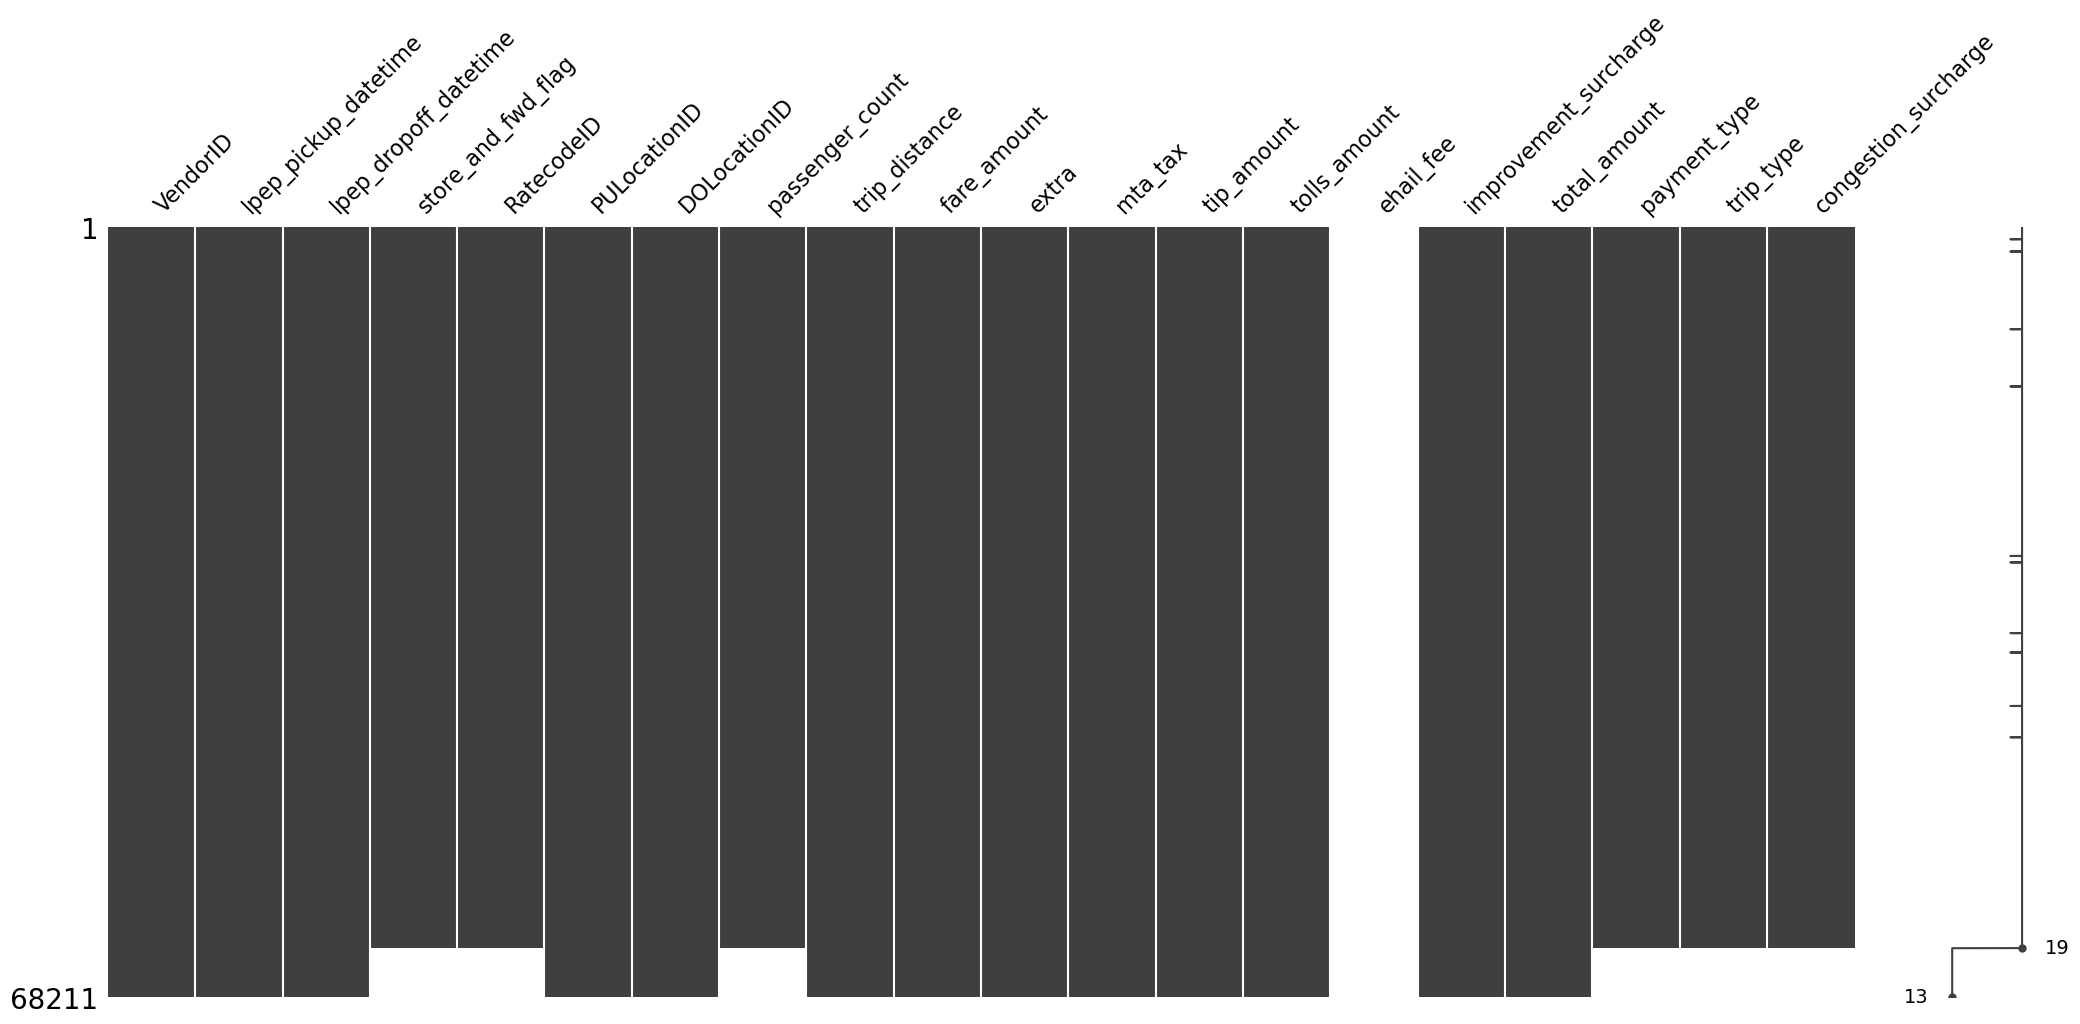

In [83]:
import missingno
missingno.matrix(df)

In [84]:
df.duplicated().sum()

0

**Insight :**
* Terdapat missing value pada 7 kolom/variable dari total 20 kolom.
* Missing value tertinggi yaitu kolom `ehail_fee`. `ehail_fee` mencerminkan biaya tambahan yang mungkin dikenakan kepada pelanggan untuk penggunaan layanan e-hail atau aplikasi serupa. Kolom `ehail_fee` memiliki persentase missing value `100%` atau sebanyak `68211`. Kolom `ehail_fee` lebih baik dihapus karena tidak ada informasi yang didapat.
* Keterkaitan missing value pada kolom `ehail_fee`dengan kolom lainnya yaitu MCAR (Missing Completely At Random) / Tidak ada hubungan antara missing data dengan nilai di kolom lain. Kita asumsikan catatan perjalanan di dataframe ini tidak menggunakan aplikasi e-hail makanya kolom `e-hail` kosong.
* Terdapat 6 kolom lainnya yang memiliki missing value yaitu `trip_type` dengan persentase `6.35%` atau sebanyak 4334,  `congestion_surcharge`, `store_and_fwd_flag`, `RatecodeID`, `payment_type` dan `passenger_count` dengan persentase `6.34%` atau sebanyak 4324.
* Keterkaitan missing value pada kolom `trip_type`, `congestion_surcharge`, `store_and_fwd_flag`, `RatecodeID`, `payment_type` dan `passenger_count` yaitu MCAR(Missing Completely At Random) / Tidak ada hubungan antara missing data dengan nilai di kolom lain. Kita asumsikan kolom - kolom tersebut kosong dikarenakan kegagalan dalam proses pencatatan perjalanan. 
* Tidak ada duplicate data pada dataset NYC TLC Trip Record.

**Ada 2 cara untuk menangani missing value**
* Pertama, menghapus baris/kolom yang berisi **missing value**. Kolom `'ehail_fee'` memiliki persentase **missing value** 100%, maka sebaiknya kolom ini dihapus.
* Kedua, cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka *mean, median* atau *modus*.

## Numerik

In [85]:
numerik = df.select_dtypes(include='number')
numerik

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


In [86]:
numerik.columns

Index(['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

### Statistik Deskriptif

In [87]:
df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


Statistik deskriptif hanya menghasilkan perhitungan dari kolom number. Berikut penjelasan statistik deskriptif untuk dataframe NYC TLC Trip Record, sebagai berikut :
* `count` : Jumlah baris (jumlah data) pada setiap kolom. Dilihat total data keseluruhan yaitu `68211`. Kolom-kolom yang count kurang dari `68211` dikarenakan memiliki `missing value`.
* `mean` : Rata-rata pada setiap kolom. Sebagai contoh `mean` pada kolom `total_amount` yaitu `21.789377`. Yang berarti `rata-rata total_amount` setiap perjalanan di sekitaran angka `21.7893`.
* `std` : Standard Deviasi / selisih setiap data dengan nilai rata-rata (mean). `std` yang tinggi menunjukkan bahwa data sangat bervariasi atau tersebar luas, sementara nilai `std` yang rendah menunjukkan bahwa data cenderung berkumpul lebih dekat dengan mean. Dalam kasus ini, `std` `total amount` adalah `15.457115`, yang menunjukkan bahwa data `total amount` cenderung memiliki variasi yang signifikan di sekitar rata-ratanya.
* `min` : Nilai paling kecil dari sekumpulan data variable. Dari hasil diatas, terdapat nilai yang menarik yaitu `total_amount` sebesar `-71.500000`. Hal ini menarik karena `total_amount` bernilai `negatif`. Bisa jadi angka negatif itu sebagai anomali.
* `25%` : Persentil yang ke-25 atau 25 persen (Q1).
* `50%` : Persentil yang ke-50 atau 50 persen (Q2) = nilai median. Nilai median dapat digunakan sebagai salah satu cara untuk menangani missing value ketika variable  terdistribusi tidak normal.
* `75%` : Persentil yang ke-75 atau 75 persen (Q3).
* `max` : Nilai paling besar dari sekumpulan data variable. Dari hasil diatas, terlihat kolom `RatecodeID` memiliki nilai `max` yaitu `99`. `Ratecode` hanya memiliki 6 jenis code yaitu 1, 2, 3, 4, 5, 6. Bisa diasumskan bahwa nilai `99` ini sebuah anomali.

Kolom `ehail_fee` tidak menghasilkan perhitungan apapun karna kolom tersebut tidak memiliki nilai sama sekali.

### Distribusi Data

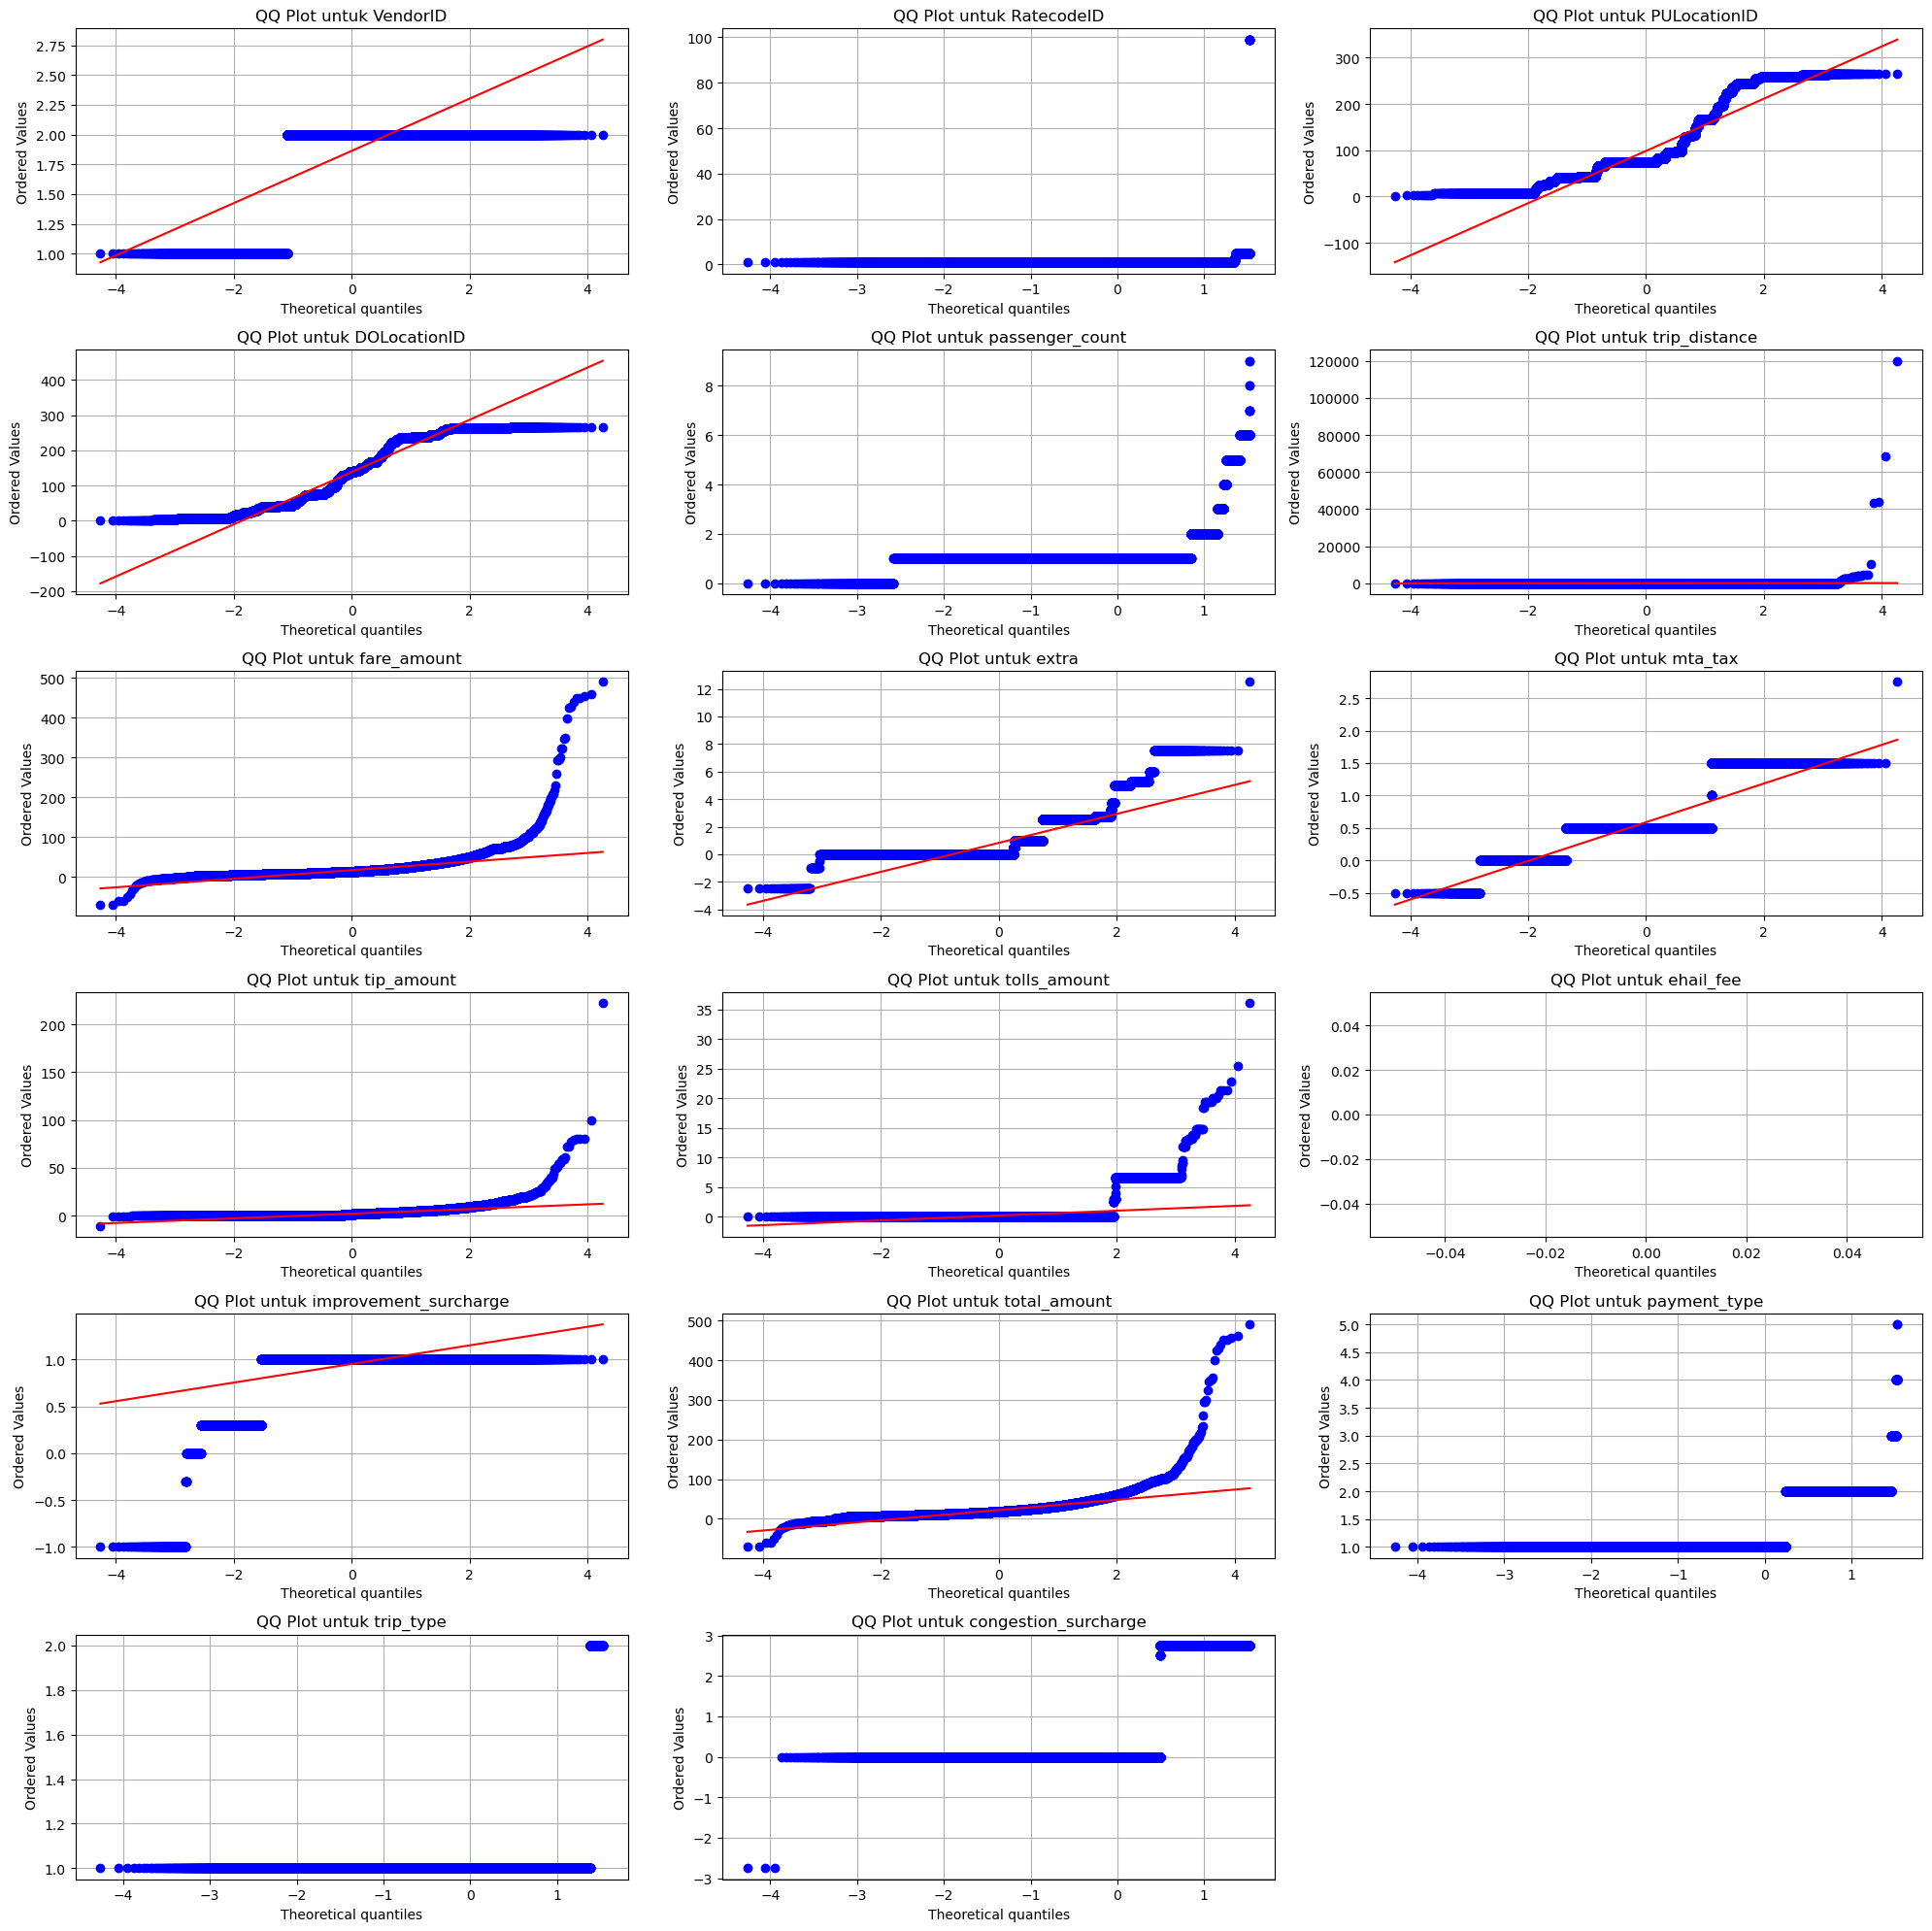

In [88]:
fig = plt.figure(figsize=(20,20)) # horizontal, vertical
count = 0
# Looping untuk membuat QQ plot untuk setiap kolom numerik
for kolom in numerik.columns:
    count += 1
    plt.subplot(6, 3, count)  # Mengatur 5 baris dan 3 kolom
    # Membuat QQ plot
    stats.probplot(numerik[kolom], dist="norm", plot=plt)
    # Memberi judul plot
    plt.title(f'QQ Plot untuk {kolom}')
    # Menampilkan grid
    plt.grid(True)

plt.tight_layout()  # Mengatur tata letak subplot agar rapi
plt.show()  # Menampilkan semua subplot


Penjelasan distribusi data berdasarkan QQ Plot diatas :
<br>1. `VendorID` : Pola persebaran data yang tidak linear dan terpusat di beberapa titik tertentu menunjukkan bahwa data tidak mengikuti distribusi normal dengan baik.
<br>2. `RatecodeID` : Variable ini tidak ada kesesuaian dengan distribusi normal.
<br>3. `PULocationID` : Pola persebaran data terkumpul dalam kelompok atau klaster sehingga tidak mengikuti distribusi normal dengan baik.
<br>4. `DOLocationID` : Pola persebaran data terkumpul dalam kelompok atau klaster sehingga tidak mengikuti distribusi normal dengan baik.
<br>5. `passenger_count` : Variable ini tidak ada kesesuaian dengan distribusi normal.
<br>6. `trip_distance` : Pola persebaran data tidak terdistribusi normal, karna ada data yang menyimpang dari dari garis lurus.
<br>7. `fare_amount` : Pola persebaran data distribusi yang kurang tersebar dibandingkan dengan distribusi normal.
<br>8. `extra` : Pola persebaran data yang tidak linear dan terpusat di beberapa titik tertentu menunjukkan bahwa data tidak mengikuti distribusi normal dengan baik.
<br>9. `mta_tax` : Pola persebaran data yang tidak linear dan terpusat di beberapa titik tertentu menunjukkan bahwa data tidak mengikuti distribusi normal dengan baik.
<br>10. `tip_amount` : Pola persebaran data distribusi yang kurang tersebar dibandingkan dengan distribusi normal.
<br>11. `tolls_amount` : Pola persebaran data distribusi yang kurang tersebar dibandingkan dengan distribusi normal.
<br>12. `ehail_fee` : Data Kosong
<br>13. `improvement_surcharge` : Pola persebaran data yang tidak linear dan terpusat di beberapa titik tertentu menunjukkan bahwa data tidak mengikuti distribusi normal dengan baik. 				
<br>14. `total_amount` : Pola persebaran data distribusi yang kurang tersebar dibandingkan dengan distribusi normal.
<br>15. `payment_type` : Variable ini tidak ada kesesuaian dengan distribusi normal.
<br>16. `trip_type` : Variable ini tidak ada kesesuaian dengan distribusi normal.
<br>17. `congestion_surcharge` : Variable ini tidak ada kesesuaian dengan distribusi normal.

### Outliers

C:\Users\HP\AppData\Local\Temp\ipykernel_10904\859209067.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\HP\AppData\Local\Temp\ipykernel_10904\859209067.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\HP\AppData\Local\Temp\ipykernel_10904\859209067.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\HP\AppData\Local\Temp\ipykernel_10904\859209067.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\HP\AppData\Local\Temp\ipykernel_10904\859209067.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\HP\AppData\Local\Temp\ipykernel_10904\859209067.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk


C:\Users\HP\AppData\Local\Temp\ipykernel_10904\859209067.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\HP\AppData\Local\Temp\ipykernel_10904\859209067.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\HP\AppData\Local\Temp\ipykernel_10904\859209067.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\HP\AppData\Local\Temp\ipykernel_10904\859209067.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\HP\AppData\Local\Temp\ipykernel_10904\859209067.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\HP\AppData\Local\Temp\ipykernel_10904\859209067.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\HP\AppData\Local\Temp\ipykernel_10904

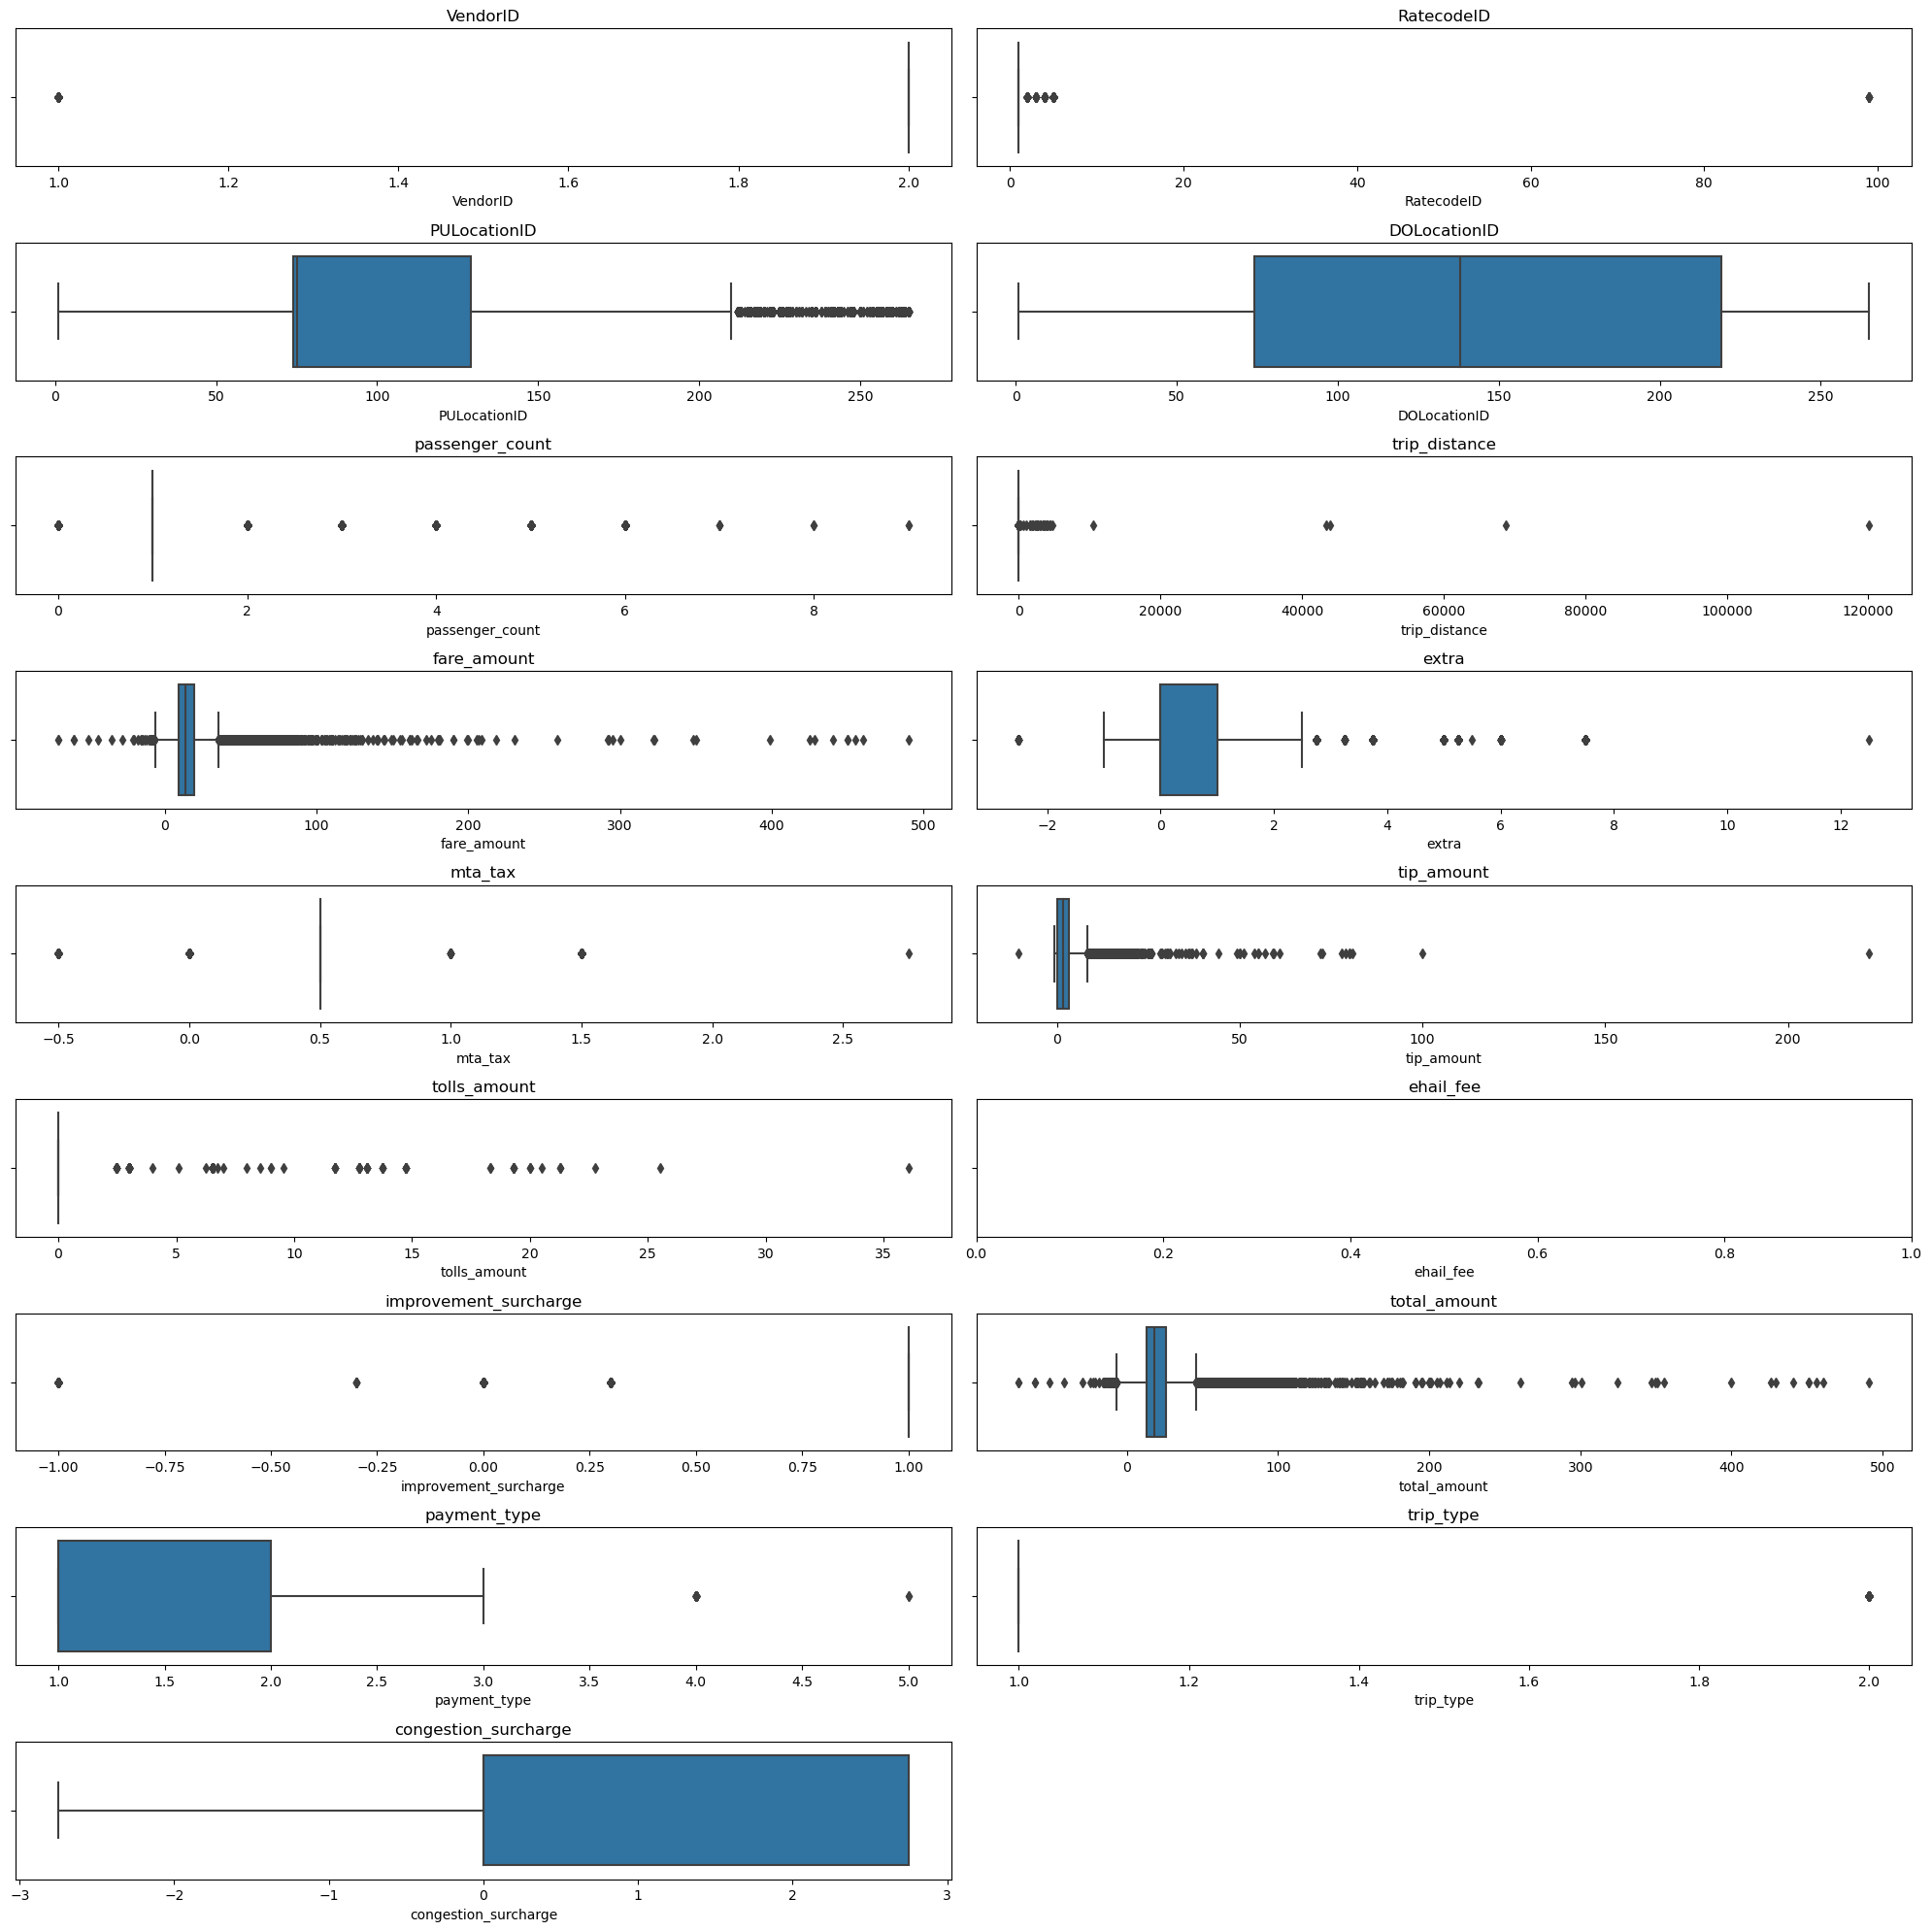

In [89]:
fig = plt.figure(figsize=(20,20)) # horizontal, vertikal

count = 0
for kolom in numerik.columns:
    count += 1
    plt.subplot(9,2,count)
    sns.boxplot(numerik, x = kolom)
    fig.tight_layout() # biar tidak tertumpuk
    plt.title(f'{kolom}')
plt.show()

In [90]:
for kolom in numerik.columns:
    q1 = df[kolom].describe().loc['25%']
    q3 = df[kolom].describe().loc['75%']
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr 

    jumlah_outliers = df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)].shape[0]
    print(f"data {kolom} memiliki outliers {jumlah_outliers}")

data VendorID memiliki outliers 9343
data RatecodeID memiliki outliers 1784
data PULocationID memiliki outliers 6133
data DOLocationID memiliki outliers 0
data passenger_count memiliki outliers 9588
data trip_distance memiliki outliers 5774
data fare_amount memiliki outliers 4339
data extra memiliki outliers 3586
data mta_tax memiliki outliers 15034
data tip_amount memiliki outliers 2045
data tolls_amount memiliki outliers 1741
data ehail_fee memiliki outliers 0
data improvement_surcharge memiliki outliers 4319
data total_amount memiliki outliers 4064
data payment_type memiliki outliers 97
data trip_type memiliki outliers 1401
data congestion_surcharge memiliki outliers 0


Penggunaan IQR (Inter Quartile Range) digunakan untuk mendeteksi potensi adanya outlier. IQR digunakan pada case ini karena dilihat pada distibusi data, data cenderung tidak normal.

Penjelasan outliers serta jumlahnya dan relevansi ouliers :

* `VendorID` : Kode LPEP (Local Public Enhancement Program) sebagai penyedia data perjalanan. Outlier disini mencerminkan terdapat variasi kode yang signifikan dalam data, yang memungkinkan adanya nilai yang sangat jauh dari nilai lainnya.   
    * Jumlah Outliers : 9343
    * Relevansi : Outliers masih relevan jika dilakukan analisis.
* `RatecodeID` : Kode tarif akhir berlaku di akhir perjalanan. Outlier disini mencerminkan terdapat variasi yang signifikan dalam data, yang memungkinkan adanya nilai yang sangat jauh dari nilai-nilai lainnya. 
    * Jumlah Outliers : 1784
    * Relevansi : Outliers masih relevan jika dilakukan analisis.
* `PULocationID` : Kode Zona taxi saat PickUp yang tercatat selama perjalan. Outlier disini mencerminkan terdapat variasi yang signifikan dalam data, yang memungkinkan adanya nilai yang sangat jauh dari nilai-nilai lainnya.
    * Jumlah Outliers : 6133
    * Relevansi : Outliers masih relevan jika dilakukan analisis.
* `DOLocationID` : Kode Zona taxi saat DropOff yang tercatat selama perjalan. Tidak adanya outlier mencerminkan bahwa data cenderung stabil atau terkonsentrasi di sekitar nilai-nilai pusat.
    * Jumlah Outliers : 0 
    * Relevansi : Outlier kurang relevan jika dianalisis.
* `passenger_count` : Jumlah penumpang di dalam kendaraan. Outlier disini mencerminkan terdapat variasi yang signifikan dalam data, yang memungkinkan adanya nilai yang sangat jauh dari nilai-nilai lainnya. 
    * Jumlah Outliers : 9588
    * Relevansi : Outliers masih relevan jika dilakukan analisis.
* `trip_distance` : Jarak perjalanan yang telah berlalu dalam mil dilaporkan oleh argometer. Outlier disini mencerminkan terdapat variasi yang signifikan dalam data, yang memungkinkan adanya nilai yang sangat jauh dari nilai-nilai lainnya.
    * Jumlah Outliers : 5774
    * Relevansi : Outliers masih relevan jika dilakukan analisis.
* `fare_amount` : Tarif waktu dan jarak dihitung oleh meter. Outlier mencerminkan terdapat nilai ekstrem yang tidak biasa ke arah kecil atau besar.
    * Jumlah Outliers : 4339
    * Relevansi : Outliers masih relevan jika dilakukan analisis.
* `extra` : Biaya tambahan yang mungkin dikenakan pada perjalanan taksi di luar biaya dasar. Outlier mencerminkan terdapat nilai ekstrem yang tidak biasa ke arah kecil atau besar. 
    * Jumlah Outliers : 3586
    * Relevansi : Outliers masih relevan jika dilakukan analisis.
* `mta_tax` : Pajak MTA $0,50 yang dipicu secara otomatis berdasarkan pada tarif meteran yang digunakan. Outlier disini mencerminkan terdapat variasi yang signifikan dalam data, yang memungkinkan adanya nilai yang sangat jauh dari nilai-nilai lainnya.
    * Jumlah Outliers : 15034
    * Relevansi : Outliers masih relevan jika dilakukan analisis.
* `tip_amount` : ecara otomatis diisi untuk tips yang diberikan dengan kartu kredit. Outlier mencerminkan terdapat nilai ekstrem yang tidak biasa ke arah kecil atau besar.
    * Jumlah Outliers : 2045
    * Relevansi : Outliers masih relevan jika dilakukan analisis.
* `tolls_amount` : Jumlah total semua tol yang dibayarkan dalam perjalanan. Outlier disini mencerminkan terdapat variasi yang signifikan dalam data, yang memungkinkan adanya nilai yang sangat jauh dari nilai-nilai lainnya.
    * Jumlah Outliers : 1741
    * Relevansi :  Outliers masih relevan jika dilakukan analisis.
* `ehail_fee` : Data Kosong
* `improvement_surcharge` : Biaya tambahan sebesar $0.30 yang dikenakan pada perjalanan yang dipesan secara langsung (hail trips). Outlier disini mencerminkan terdapat variasi yang signifikan dalam data, yang memungkinkan adanya nilai yang sangat jauh dari nilai-nilai lainnya.  	
    * Jumlah Outliers : 4319
    * Relevansi :  Outliers masih relevan jika dilakukan analisis.
* `total_amount` : umlah total yang dibebankan kepada penumpang. Outlier mencerminkan terdapat nilai ekstrem yang tidak biasa ke arah kecil atau besar.
    * Jumlah Outliers : 4064
    * Relevansi : Outliers masih relevan jika dilakukan analisis.
* `payment_type` : Kode numerik yang menandakan cara penumpang membayar untuk perjalanan. Outlier disini mencerminkan terdapat variasi kode yang signifikan dalam data, yang memungkinkan adanya nilai yang sangat jauh dari nilai lainnya.
    * Jumlah Outliers : 97
    * Relevansi : Outliers masih relevan jika dilakukan analisis.
* `trip_type` : Kode yang menunjukkan apakah perjalanan tersebut dimulai melalui penjemputan di jalan (street hail) atau melalui Dispatch (Pengiriman Panggilan). Outlier disini mencerminkan terdapat variasi kode yang signifikan dalam data, yang memungkinkan adanya nilai yang sangat jauh dari nilai lainnya. 
    * Jumlah Outliers : 1401
    * Relevansi : Outliers masih relevan jika dilakukan analisis.
* `congestion_surcharge` : Biaya tambahan yang dikenakan pada perjalanan taksi sebagai tanggapan terhadap kemacetan lalu lintas di daerah-daerah tertentu. Tidak adanya outlier mencerminkan bahwa data cenderung stabil atau terkonsentrasi di sekitar nilai-nilai pusat.
    * Jumlah Outliers :0
    * Relevansi : Outlier kurang relevan jika dianalisis.

**Insight** :
<br>* `trip_distance`, `extra`, dan `tip_amount` memiliki `pola` outlier yang sama, terdapat outlier terjauh/sangat berbeda dengan variasi data lainnya. 
<br>* Nilai outliers tidak di hapus karena dapat memberikan informasi. Kemungkinan ada perjalanan yang sangat jauh mencapai jarak 120000 miles, dikenakan biaya extra tinggi karena perjalanan di jam sibuk/ke lokasi tertentu dan memberikan tip yang besar.

### Korelasi

In [91]:
numerik.corr(method='spearman')

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
VendorID,1.000000,0.039033,0.022781,-0.000645,0.066543,0.088612,0.012472,-0.113259,-0.796512,0.077001,-0.018768,NaN,-0.080561,0.019220,0.017625,0.042880,0.009496
RatecodeID,0.039033,1.000000,0.060780,0.033938,0.019883,-0.053659,0.122776,-0.116860,-0.367643,-0.016248,0.093443,NaN,-0.081666,0.086353,-0.026325,0.885520,-0.074991
PULocationID,0.022781,0.060780,1.000000,0.071695,0.022483,0.061138,0.083514,0.049689,-0.042762,-0.037179,0.029788,NaN,0.008862,0.060336,0.060945,0.057533,-0.124637
DOLocationID,-0.000645,0.033938,0.071695,1.000000,0.001883,0.183844,0.176940,0.061015,-0.011380,0.159971,0.004580,NaN,-0.010275,0.248704,-0.101440,0.031763,0.409786
passenger_count,0.066543,0.019883,0.022483,0.001883,1.000000,0.032994,0.026648,0.014429,-0.067519,0.022654,-0.001105,NaN,0.029269,0.031163,0.001304,0.015328,0.015685
trip_distance,0.088612,-0.053659,0.061138,0.183844,0.032994,1.000000,0.816941,0.072249,-0.109032,0.320234,0.182718,NaN,0.031702,0.799851,-0.064920,-0.084690,0.334596
fare_amount,0.012472,0.122776,0.083514,0.176940,0.026648,0.816941,1.000000,-0.025312,-0.127937,0.275411,0.232924,NaN,0.068899,0.947950,-0.105943,0.089910,0.283539
extra,-0.113259,-0.116860,0.049689,0.061015,0.014429,0.072249,-0.025312,1.000000,0.229756,0.095248,0.011307,NaN,0.046768,0.120627,-0.067591,-0.113249,0.091983
mta_tax,-0.796512,-0.367643,-0.042762,-0.011380,-0.067519,-0.109032,-0.127937,0.229756,1.000000,-0.116728,-0.038357,NaN,0.110605,-0.106919,-0.019050,-0.383010,0.021663
tip_amount,0.077001,-0.016248,-0.037179,0.159971,0.022654,0.320234,0.275411,0.095248,-0.116728,1.000000,0.088922,NaN,0.017062,0.467981,-0.759582,-0.019737,0.347540


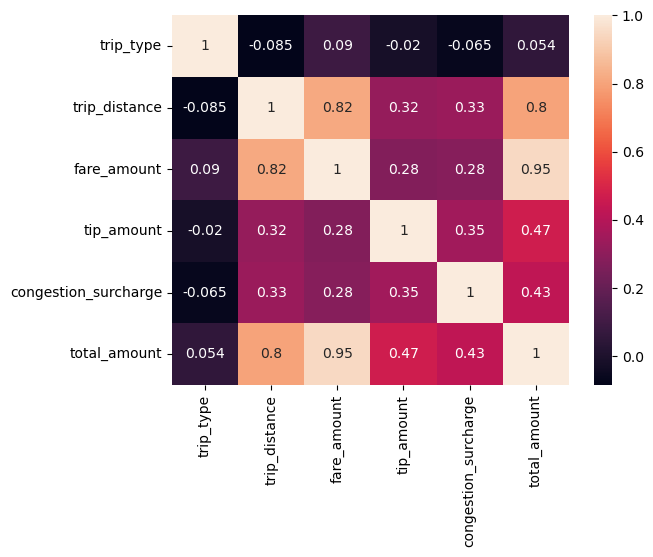

<Figure size 1500x1500 with 0 Axes>

In [92]:
# Memilih subset variabel yang relevan
subset_numerik = df[['trip_type','trip_distance', 'fare_amount','tip_amount', 'congestion_surcharge','total_amount']]
# subset_numerik = df[['trip_type','trip_distance', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',	'improvement_surcharge'	,'total_amount','congestion_surcharge']]

# Membuat heatmap dengan subset variabel
heatmap = sns.heatmap(subset_numerik.corr(method='spearman'), annot=True)

# Mengatur ukuran plot
plt.figure(figsize=(15, 15))

# Menyesuaikan layout
plt.tight_layout()

# Menampilkan plot
plt.show()

**Variable yang berkorelasi :**
* `total_amount` dan `congestion_surcharge` memiliki korelasi positif yaitu sebesar 0.43. Korelasi ini menunjukkan ketika peningkatan `total_amount` berjalan searah dengan peningkatan `congestion_surcharge` (biaya tambahan untuk ke dearah kemacetan).
* `total_amount` dan `tip_amount` memiliki korelasi positif yaitu sebesar 0.47. Korelasi ini mencerminkan bahwa ketika peningkatan `total_amount` berjalan searah dengan peningkatan `tip_amount`.
* `total_amount` dan `fare_amount` memiliki korelasi positif yang cukup tinggi yaitu sebesar 0.95. Korelasi ini menunjukkan bahwa ketika peningkatan `total_amount` berjalan searah dengan peningkatan `fare_amount`.
* `total_amount` dan `trip_distance` memiliki korelasi positif yang cukup tinggi yaitu sebesar 0.8. Korelasi ini menunjukkan bahwa ketika peningkatan `total_amount` berjalan searah dengan peningkatan jarak `trip_distance`.
* `total_amount` dan `trip_type` memiliki korelasi positif namun rendah yaitu sebesar 0.054. Korelasi ini menunjukkan bahwa hubungan antara dua variabel ini sangat lemah.

## Kategorik

In [93]:
kategorik = df.select_dtypes(exclude='number')
kategorik

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
0,2023-01-01 00:26:10,2023-01-01 00:37:11,N
1,2023-01-01 00:51:03,2023-01-01 00:57:49,N
2,2023-01-01 00:35:12,2023-01-01 00:41:32,N
3,2023-01-01 00:13:14,2023-01-01 00:19:03,N
4,2023-01-01 00:33:04,2023-01-01 00:39:02,N
...,...,...,...
68206,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN
68207,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN
68208,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN
68209,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN


In [94]:
kategorik.columns

Index(['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'store_and_fwd_flag'], dtype='object')

### Count Values

In [95]:
kategorik.nunique()

lpep_pickup_datetime     66575
lpep_dropoff_datetime    66519
store_and_fwd_flag       2    
dtype: int64

Penjelasan Count Values :
1.  Kolom `lpep_pickup_datetime` memiliki nilai unik sebesar `66575`.
2.  Kolom `lpep_dropoff_datetime` memiliki nilai unik sebesar `66519`.
3.  Kolom `store_and_fwd_flag` memiliki nilai unik yaitu `2`.

### Modus

In [96]:
kategorik.describe(include='object')

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


Penjelasan Modus :
* `lpep_pickup_datetime`
    * Memiliki nilai unik sebesar `66575`.
    * Waktu yang seringg muncul yaitu `2023-01-09 09:08:00` sebanyak `4` kali perjalanan.
* `lpep_dropoff_datetime`
    * Memiliki nilai unik sebesar `66519`.
    * Waktu yang seringg muncul yaitu `2023-01-09 00:00:00` sebanyak `6` kali perjalanan.
* `store_and_fwd_flag`
    * Memiliki nilai unik yaitu `2`.
    * Catatan perjalanan yang sering muncul yaitu `N` (Catatan perjalanan tidak disimpan dalam memori kendaraan sebelum dikirimkan ke penyedia layanan) sebanyak `63579`.

C:\Users\HP\AppData\Local\Temp\ipykernel_10904\1116627752.py:7: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_10904\1116627752.py:7: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


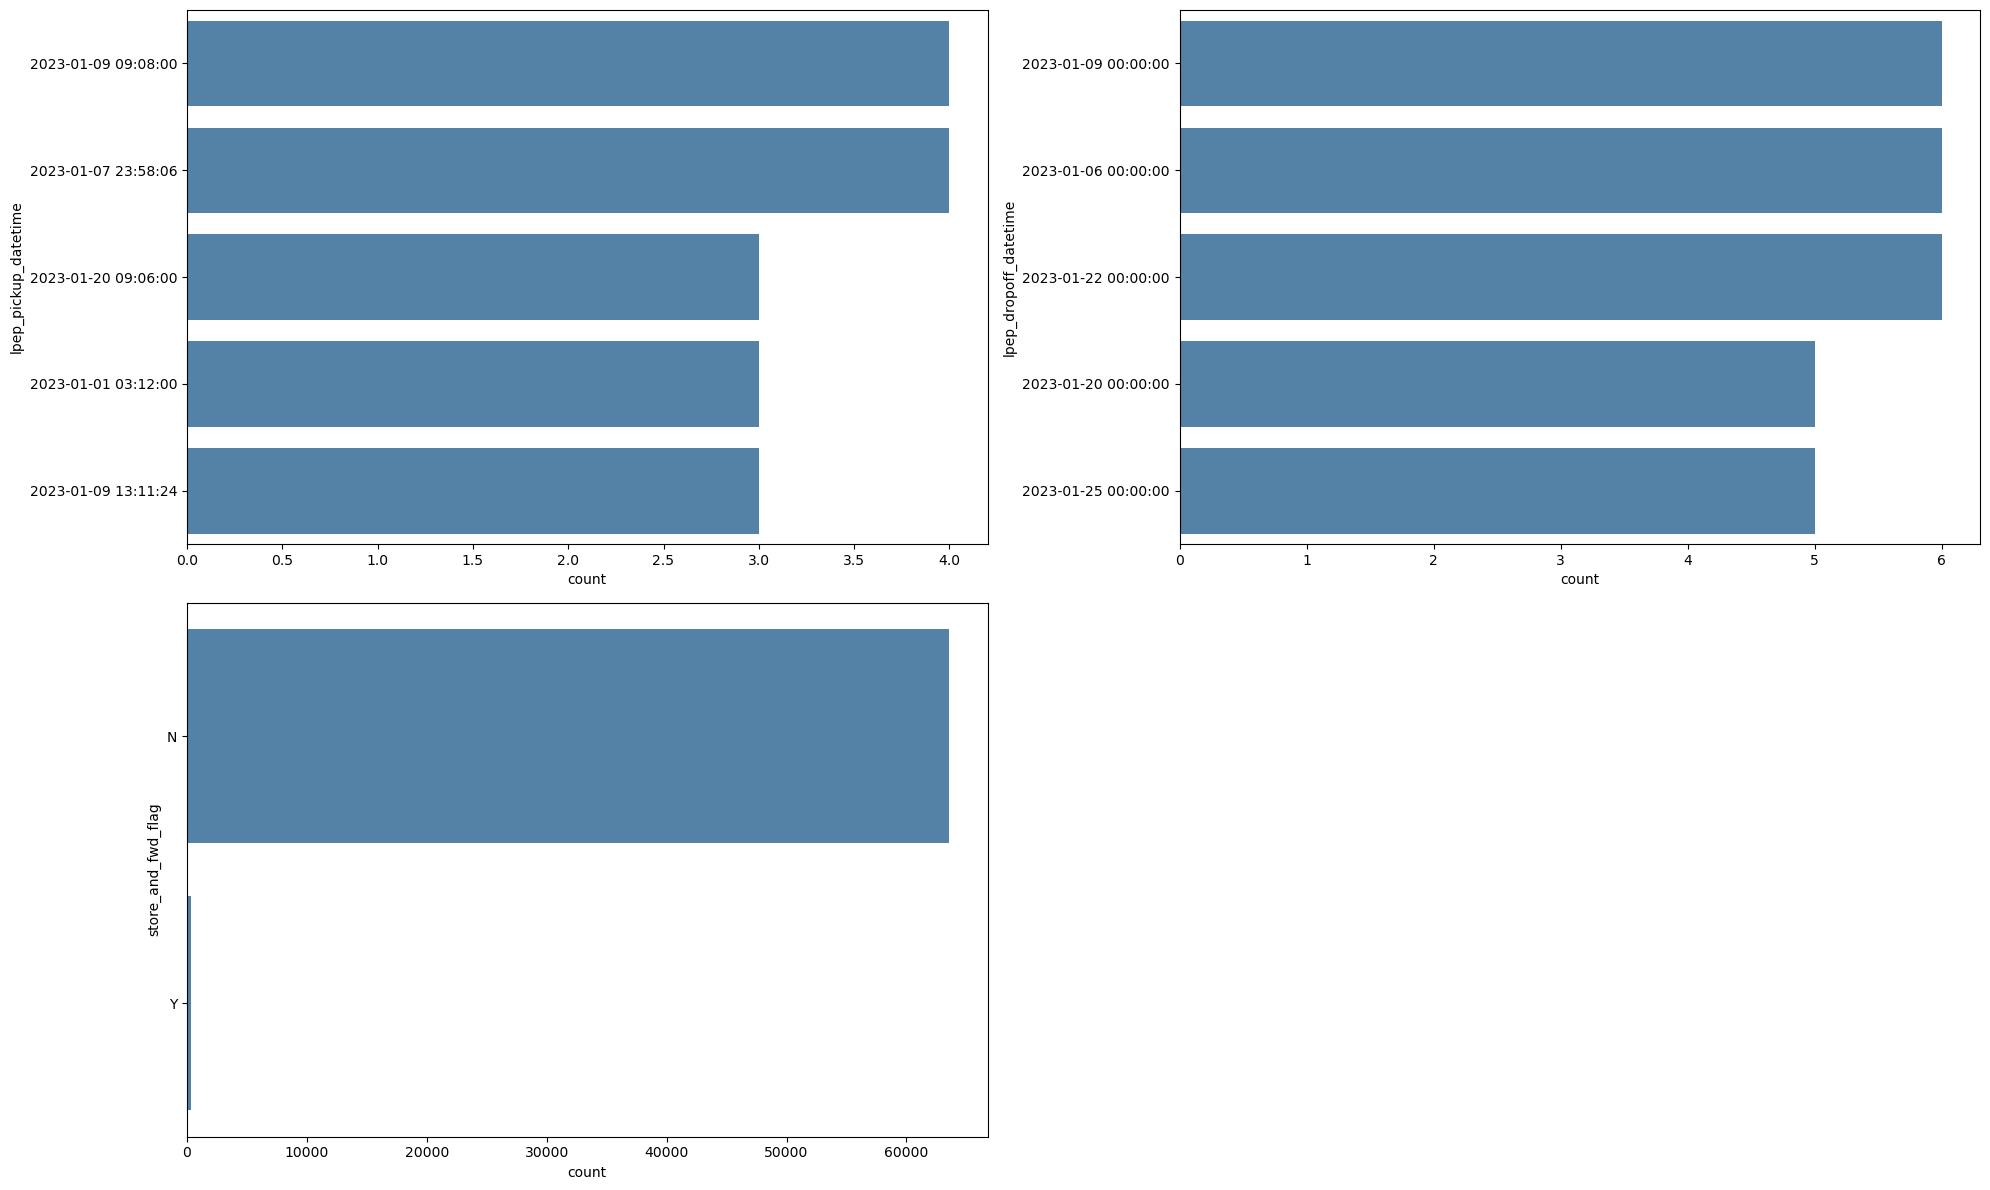

In [97]:
count = 0
fig = plt.figure(figsize=(20,12))
for kolom in kategorik.columns:
    count += 1
    plt.subplot(2,2,count)
    sns.countplot(y = kolom, data = kategorik, order = kategorik[kolom].value_counts().sort_values(ascending = False).head(5).index, color= 'steelblue')
    fig.tight_layout()
plt.show()

Penjelasan CountPlot :
* `lpep_pickup_datetime` 
    * Terdapat 2 date time yang sering terjadi penjemputan perjalanan yaitu `2023-01-09 09:08:00` dan `2023-01-07 23:58:06`.
    * Penjemputan perjalanan tersebut tercatat 4 kali penjemputan.
* `lpep_dropoff_datetime`
    * Terdapat 3 date time yang sering terjadi penurunan perjalanan yaitu `2023-01-22 00:00:00` dan `2023-01-06 00:00:00` dan `2023-01-09 00:00:00`.
    * Pengantaran Perjalanan tersebut tercatat 6 kali penurunan.
* `store_and_fwd_flag`
    * Kode `N` yang sering muncul dalam pencatatan perjalanan yang berarti catatan perjalanan tidak disimpan dalam memori kendaraan sebelum dikirimkan ke penyedia layanan.
    * Kode `N` tercatat sebanyak `63579`

# Data Cleaning
Proses ini penting dalam analisis data yang bertujuan untuk menemukan, memperbaiki, dan menghapus kesalahan, anomali, atau ketidaksesuaian dalam dataset.

In [98]:
df_prep = df.copy()

## Mengubah Type Data

In [99]:
# Sebelum kolom 'lpep_pickup_datetime' 'lpep_dropoff_datetime' di ubah type datanya menjadi datetime
print(f'Jumlah baris dan kolom di dataset df adalah {df_prep.shape}')
df_prep.info()

Jumlah baris dan kolom di dataset df adalah (68211, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14

In [100]:
# Mengubah tipe data object menjadi datetime
df_prep['lpep_pickup_datetime'] = df_prep['lpep_pickup_datetime'].astype('datetime64[ns]')
df_prep['lpep_dropoff_datetime'] = df_prep['lpep_dropoff_datetime'].astype('datetime64[ns]')

In [101]:
# Setelah kolom 'lpep_pickup_datetime' 'lpep_dropoff_datetime' di ubah type datanya menjadi datetime
print(f'Jumlah baris dan kolom di dataset df adalah {df_prep.shape}')
df_prep.info()

Jumlah baris dan kolom di dataset df adalah (68211, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68211 non-null  int64         
 1   lpep_pickup_datetime   68211 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68211 non-null  datetime64[ns]
 3   store_and_fwd_flag     63887 non-null  object        
 4   RatecodeID             63887 non-null  float64       
 5   PULocationID           68211 non-null  int64         
 6   DOLocationID           68211 non-null  int64         
 7   passenger_count        63887 non-null  float64       
 8   trip_distance          68211 non-null  float64       
 9   fare_amount            68211 non-null  float64       
 10  extra                  68211 non-null  float64       
 11  mta_tax                68211 non-null  float64       
 12  tip_

Variable `lpep_pickup_datetime` dan `lpep_dropoff_datetime` yang awalnya bertipe data object, telah di ubah menjadi tipe data datetime karna tipe data obbject tidak sesuai pada kolom ini.

## Handling Missing Values

### 1.Menghapus kolom `ehail_fee`
Kolom `ehail_fee` dihapus karena memiliki **missing value** dengan persentase 100% atau tidak ada data didalamnya dan tidak didapatkan informasi pada kolom ini.

In [102]:
df_prep = df_prep.drop(columns = ['ehail_fee'])
df_prep.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00


In [104]:
df_prep.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

### 2.Mengisi missing value `trip_type`
`Trip_type`
<br>Kode yang menunjukkan apakah perjalanan tersebut dimulai melalui penjemputan di jalan (street hail) atau melalui Dispatch (Pengiriman Panggilan) yang diberikan secara otomatis berdasarkan tarif yang dihitung oleh meter, namun bisa diubah oleh pengemudi.
<br>1 = Street-hail (Penjemputan di jalan)
<br>2 = Dispatch (Pengiriman Panggilan/Aplikasi tertentu)

In [105]:
df_prep[df_prep['trip_type'].isna()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
1084,1,2023-01-01 19:44:13,2023-01-01 19:58:30,N,99.0,150,55,1.0,3.30,18.20,0.0,1.5,0.00,0.0,1.0,19.70,1.0,NaN,0.0
2174,1,2023-01-02 16:39:05,2023-01-02 17:31:42,N,99.0,73,82,1.0,3.70,23.50,0.0,1.5,0.00,0.0,1.0,25.00,1.0,NaN,0.0
9055,1,2023-01-05 20:33:45,2023-01-05 22:46:41,N,99.0,14,123,1.0,6.20,28.20,0.0,1.5,0.00,0.0,1.0,29.70,1.0,NaN,0.0
14125,1,2023-01-08 11:36:41,2023-01-08 12:14:59,N,99.0,61,77,1.0,2.70,22.50,0.0,1.5,0.00,0.0,1.0,24.00,1.0,NaN,0.0
29143,1,2023-01-15 13:51:42,2023-01-15 14:37:38,N,99.0,108,181,1.0,6.50,24.20,0.0,1.5,0.00,0.0,1.0,25.70,1.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,NaN,NaN


In [106]:
# Nilai modus pada kolom trip_type
mode_trip_type = df_prep['trip_type'].mode()
print(f'Modus Trip Type : {mode_trip_type}')

median_trip_type = df_prep['trip_type'].median()
print(f'Median Trip Type : {median_trip_type}')

Modus Trip Type : 0    1.0
Name: trip_type, dtype: float64
Median Trip Type : 1.0


In [107]:
# Kolom 'trip_type akan diisikan dengan nilai 1 berdasarkan median yang didapat
df_prep['trip_type'].fillna(median_trip_type, inplace=True)

In [108]:
df_prep['trip_type'].unique()

array([1., 2.])

In [109]:
df_prep['trip_type'].isna().sum()

0

<br>`trip_type` menghasilkan nilai modus yaitu 1
<br>`trip_type` menghasilkan nilai median yaitu 1
<br>Missing value `trip_type` diisi oleh nilai median karena kolom ini termasuk numerik dan distribusi datanya tidak normal.

### 3.Mengisi missing value `congestion_surcharge`

In [110]:
df_prep[df_prep['congestion_surcharge'].isna()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
63887,2,2023-01-01 00:28:00,2023-01-01 00:54:00,NaN,NaN,7,17,NaN,9.33,36.03,0.0,0.0,7.41,0.0,1.0,44.44,NaN,1.0,NaN
63888,2,2023-01-01 00:39:00,2023-01-01 00:52:00,NaN,NaN,37,37,NaN,2.67,14.55,0.0,0.0,3.11,0.0,1.0,18.66,NaN,1.0,NaN
63889,2,2023-01-01 00:58:00,2023-01-01 01:21:00,NaN,NaN,80,7,NaN,7.39,32.13,0.0,0.0,6.63,0.0,1.0,39.76,NaN,1.0,NaN
63890,2,2023-01-01 00:35:00,2023-01-01 00:55:00,NaN,NaN,169,42,NaN,4.04,17.85,0.0,0.0,0.00,0.0,1.0,18.85,NaN,1.0,NaN
63891,2,2023-01-01 00:45:00,2023-01-01 00:55:00,NaN,NaN,42,262,NaN,3.86,19.67,0.0,0.0,4.68,0.0,1.0,28.10,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,NaN,1.0,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,1.0,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,1.0,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,1.0,NaN


In [111]:
median_congestion_surcharge = df_prep['congestion_surcharge'].median()
print(f'Median congestion_surcharge : {median_congestion_surcharge}')

Median congestion_surcharge : 0.0


In [112]:
# Kolom 'congestion_surcharge akan diisikan dengan nilai 0 berdasarkan median yang didapat
df_prep['congestion_surcharge'].fillna(median_congestion_surcharge, inplace=True)

In [113]:
df_prep['congestion_surcharge'].isna().sum()

0

<br>`congestion_surcharge` menghasilkan nilai median yaitu 0
<br>Missing value `congestion_surcharge` diisi oleh nilai median karena kolom ini termasuk numerik dan distribusi datanya tidak normal.

### 4.Mengisi missing value `store_and_fwd_flag`
`Store_and_fwd_flag`
<br>Tanda catatan perjalanan disimpan dalam memori kendaraan sebelum dikirimkan ke penyedia layanan (vendor), yang dikenal sebagai "store and forward," karena kendaraan tidak memiliki koneksi ke server.
<br>Y = store and forward trip (Catatan perjalanan disimpan dalam memori kendaraan sebelum dikirimkan ke penyedia layanan.)
<br>N = not a store and forward trip (Catatan perjalanan tidak disimpan dalam memori kendaraan sebelum dikirimkan ke penyedia layanan.)

In [114]:
df_prep[df_prep['store_and_fwd_flag'].isna()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
63887,2,2023-01-01 00:28:00,2023-01-01 00:54:00,NaN,NaN,7,17,NaN,9.33,36.03,0.0,0.0,7.41,0.0,1.0,44.44,NaN,1.0,0.0
63888,2,2023-01-01 00:39:00,2023-01-01 00:52:00,NaN,NaN,37,37,NaN,2.67,14.55,0.0,0.0,3.11,0.0,1.0,18.66,NaN,1.0,0.0
63889,2,2023-01-01 00:58:00,2023-01-01 01:21:00,NaN,NaN,80,7,NaN,7.39,32.13,0.0,0.0,6.63,0.0,1.0,39.76,NaN,1.0,0.0
63890,2,2023-01-01 00:35:00,2023-01-01 00:55:00,NaN,NaN,169,42,NaN,4.04,17.85,0.0,0.0,0.00,0.0,1.0,18.85,NaN,1.0,0.0
63891,2,2023-01-01 00:45:00,2023-01-01 00:55:00,NaN,NaN,42,262,NaN,3.86,19.67,0.0,0.0,4.68,0.0,1.0,28.10,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,NaN,1.0,0.0
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,1.0,0.0
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,1.0,0.0
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,1.0,0.0


In [115]:
mode_store_and_fwd_flag = df_prep['store_and_fwd_flag'].mode()
mode_store_and_fwd_flag

0    N
Name: store_and_fwd_flag, dtype: object

In [116]:
# kolom store_and_fwd_flag yang kosong akan diisi nilai N sesuai nilai modus
df_prep['store_and_fwd_flag']= df_prep['store_and_fwd_flag'].fillna('N')

In [117]:
df_prep['store_and_fwd_flag'].unique()

array(['N', 'Y'], dtype=object)

In [118]:
df_prep['store_and_fwd_flag'].isna().sum()

0

<br>`store_and_fwd_flag` menghasilkan nilai modus yaitu N
<br>Missing value `store_and_fwd_flag` diisi oleh nilai modus karena kolom ini termasuk kategorik.

### 5.Mengisi missing value `RatecodeID`
`RateCodeID`
<br>Kode tarif akhir berlaku di akhir perjalanan.
<br>1 = Standard rate (Tarif standar untuk perjalanan dalam kota)
<br>2 = JFK (Tarif untuk perjalanan dari/ke airport international John F. Kennedy)
<br>3 = Newark (Tarif untuk perjalanan dari/ke airport international Newark)
<br>4 = Nassau or Westchester (Tarif untuk perjalanan ke Nassau atau Westchester)
<br>5 = Negotiated fare (Tarif yang Dinegosiasikan sebelumnya antara penyedia layanan dan penumpang. Tarif ini mungkin berlaku untuk perjalanan khusus atau perjanjian bisnis tertentu.)
<br>6 = Group ride (Tarif ini diterapkan ketika penumpang menggunakan layanan perjalanan kelompok, di mana beberapa penumpang bersama-sama melakukan perjalanan dengan tujuan yang sama atau searah.)

In [119]:
df_prep[df_prep['RatecodeID'].isna()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
63887,2,2023-01-01 00:28:00,2023-01-01 00:54:00,N,NaN,7,17,NaN,9.33,36.03,0.0,0.0,7.41,0.0,1.0,44.44,NaN,1.0,0.0
63888,2,2023-01-01 00:39:00,2023-01-01 00:52:00,N,NaN,37,37,NaN,2.67,14.55,0.0,0.0,3.11,0.0,1.0,18.66,NaN,1.0,0.0
63889,2,2023-01-01 00:58:00,2023-01-01 01:21:00,N,NaN,80,7,NaN,7.39,32.13,0.0,0.0,6.63,0.0,1.0,39.76,NaN,1.0,0.0
63890,2,2023-01-01 00:35:00,2023-01-01 00:55:00,N,NaN,169,42,NaN,4.04,17.85,0.0,0.0,0.00,0.0,1.0,18.85,NaN,1.0,0.0
63891,2,2023-01-01 00:45:00,2023-01-01 00:55:00,N,NaN,42,262,NaN,3.86,19.67,0.0,0.0,4.68,0.0,1.0,28.10,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,NaN,1.0,0.0
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,1.0,0.0
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,1.0,0.0
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,1.0,0.0


In [120]:
# Nilai modus pada kolom RatecodeID
mode_ratecodeID = df_prep['RatecodeID'].mode()
print(f'Modus RatecodeID : {mode_ratecodeID}')

median_ratecodeID = df_prep['RatecodeID'].median()
print(f'Median RatecodeID : {median_ratecodeID}')

Modus RatecodeID : 0    1.0
Name: RatecodeID, dtype: float64
Median RatecodeID : 1.0


In [121]:
# Kolom 'RatecodeID akan diisikan dengan nilai 1 berdasarkan median yang didapat
df_prep['RatecodeID'].fillna(median_ratecodeID, inplace=True)

In [122]:
df_prep['RatecodeID'].unique()

array([ 1.,  5.,  4.,  3.,  2., 99.])

In [123]:
df_prep['RatecodeID'].isna().sum()

0

<br>`RatecodeID` menghasilkan nilai modus yaitu 1
<br>`RatecodeID` menghasilkan nilai median yaitu 1
<br>Missing value `RatecodeID` diisi oleh nilai median karena kolom ini termasuk numerik dan distribusi datanya tidak normal.

### 6.Mengisi missing value `payment_type`
`Payment_type`
<br>Kode numerik yang menandakan cara penumpang membayar untuk perjalanan.
<br>1 = Credit Card (Kartu Kredit)
<br>2 = Cash (Tunai)
<br>3 = No charge (Tanpa Biaya)
<br>4 = Dispute (Ketidaksepakatan terkait pembayaran perjalanan)
<br>5 = Unknown (Pembayaran perjalanan tidak diketahui atau tidak tersedia)
<br>6 = Voided trip (Perjalanan dibatalkan)

In [124]:
df_prep[df_prep['payment_type'].isna()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
63887,2,2023-01-01 00:28:00,2023-01-01 00:54:00,N,1.0,7,17,NaN,9.33,36.03,0.0,0.0,7.41,0.0,1.0,44.44,NaN,1.0,0.0
63888,2,2023-01-01 00:39:00,2023-01-01 00:52:00,N,1.0,37,37,NaN,2.67,14.55,0.0,0.0,3.11,0.0,1.0,18.66,NaN,1.0,0.0
63889,2,2023-01-01 00:58:00,2023-01-01 01:21:00,N,1.0,80,7,NaN,7.39,32.13,0.0,0.0,6.63,0.0,1.0,39.76,NaN,1.0,0.0
63890,2,2023-01-01 00:35:00,2023-01-01 00:55:00,N,1.0,169,42,NaN,4.04,17.85,0.0,0.0,0.00,0.0,1.0,18.85,NaN,1.0,0.0
63891,2,2023-01-01 00:45:00,2023-01-01 00:55:00,N,1.0,42,262,NaN,3.86,19.67,0.0,0.0,4.68,0.0,1.0,28.10,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,1.0,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,NaN,1.0,0.0
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1.0,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,1.0,0.0
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,1.0,0.0
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,1.0,0.0


In [125]:
# Kolom 'payment_type akan diisikan dengan nilai 5  
# Berdasarkan uraian kolom bahwa kode 5 berarti Unknown (Pembayaran perjalanan tidak diketahui atau tidak tersedia)
df_prep['payment_type']= df_prep['payment_type'].fillna(5)

In [126]:
df_prep['payment_type'].unique()

array([1., 2., 3., 4., 5.])

In [127]:
df_prep['payment_type'].isna().sum()

0

<br>`payment_type` memiliki kode 1, 2, 3, 4, 5.
<br> Kode 5 memiliki arti Unknown (Pembelajaran perjalanan tidak ketahui atau tidak tersedia)
<br> Missing value `payment_type` diisi oleh kode 5 karena Nan berarti Unknown atau 5.

### 7.Mengisi missing value `passenger_count`

In [128]:
df_prep[df_prep['passenger_count'].isna()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
63887,2,2023-01-01 00:28:00,2023-01-01 00:54:00,N,1.0,7,17,NaN,9.33,36.03,0.0,0.0,7.41,0.0,1.0,44.44,5.0,1.0,0.0
63888,2,2023-01-01 00:39:00,2023-01-01 00:52:00,N,1.0,37,37,NaN,2.67,14.55,0.0,0.0,3.11,0.0,1.0,18.66,5.0,1.0,0.0
63889,2,2023-01-01 00:58:00,2023-01-01 01:21:00,N,1.0,80,7,NaN,7.39,32.13,0.0,0.0,6.63,0.0,1.0,39.76,5.0,1.0,0.0
63890,2,2023-01-01 00:35:00,2023-01-01 00:55:00,N,1.0,169,42,NaN,4.04,17.85,0.0,0.0,0.00,0.0,1.0,18.85,5.0,1.0,0.0
63891,2,2023-01-01 00:45:00,2023-01-01 00:55:00,N,1.0,42,262,NaN,3.86,19.67,0.0,0.0,4.68,0.0,1.0,28.10,5.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,1.0,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,5.0,1.0,0.0
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1.0,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,5.0,1.0,0.0
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,5.0,1.0,0.0
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,5.0,1.0,0.0


In [129]:
median_passenger_count = df_prep['passenger_count'].median()
print(f'Median Passenger Count : {median_passenger_count}')

Median Passenger Count : 1.0


In [130]:
# Kolom 'passenger_count akan diisikan dengan nilai 1 berdasarkan median yang didapat
df_prep['passenger_count'].fillna(median_passenger_count, inplace=True)

In [131]:
df_prep['passenger_count'].isna().sum()

0

<br>`passenger_count` menghasilkan nilai median yaitu 1
<br>Missing value `passenger_count` diisi oleh nilai median karena kolom ini termasuk numerik dan distribusi datanya tidak normal.

### 8.Cek Total Missing Value Setelah dilakukan drop kolom dan inputasi

In [132]:
# Menampilkan persentase data missing values pada dataset df_prep:
print(f'Jumlah baris dan kolom di dataset df_prep adalah {df_prep.shape}')
total_data = len(df_prep) #total data keseluruhan
missing = df_prep.isna().sum().sort_values(ascending=True) #total missing value
persentase = missing / total_data * 100 #persentase missing value
pd.DataFrame({'Total':missing, 'Persentase':persentase})

Jumlah baris dan kolom di dataset df_prep adalah (68211, 19)


,Total,Persentase
VendorID,0,0.0
payment_type,0,0.0
total_amount,0,0.0
improvement_surcharge,0,0.0
tolls_amount,0,0.0
tip_amount,0,0.0
mta_tax,0,0.0
extra,0,0.0
trip_type,0,0.0
fare_amount,0,0.0


## Handling Outliers

### 1.Menghapus anomali pada `RateCodeID`
Terdapat anomali pada kolom `RatecodeID` yaitu terdapat nilai '99', padahal merujuk pada uraian kolom `RatecodeID` hanya terdapat nilai 1 - 6 sebagai berikut :
<br>Kode tarif akhir berlaku di akhir perjalanan.
<br>1 = Standard rate (Tarif standar untuk perjalanan dalam kota)
<br>2 = JFK (Tarif untuk perjalanan dari/ke airport international John F. Kennedy)
<br>3 = Newark (Tarif untuk perjalanan dari/ke airport international Newark)
<br>4 = Nassau or Westchester (Tarif untuk perjalanan ke Nassau atau Westchester)
<br>5 = Negotiated fare (Tarif yang Dinegosiasikan sebelumnya antara penyedia layanan dan penumpang. Tarif ini mungkin berlaku untuk perjalanan khusus atau perjanjian bisnis tertentu.)
<br>6 = Group ride (Tarif ini diterapkan ketika penumpang menggunakan layanan perjalanan kelompok, di mana beberapa penumpang bersama-sama melakukan perjalanan dengan tujuan yang sama atau searah.)

Maka baris yang `RatecodeID` nya bernilai 99 akan dilakukan tindakan berupa penghapusan.

In [133]:
df_prep['RatecodeID'].unique()

array([ 1.,  5.,  4.,  3.,  2., 99.])

In [134]:
# menampilkan baris yang 'RatecodeID' nya == 99
total_anomali_ratecodid = df_prep[df_prep['RatecodeID'] == 99]['RatecodeID'].count()
print(f'Total anomali 99 pada kolom `RatecodeID` : {total_anomali_ratecodid}')
df_prep[df_prep['RatecodeID'] == 99]

Total anomali 99 pada kolom `RatecodeID` : 10


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
1084,1,2023-01-01 19:44:13,2023-01-01 19:58:30,N,99.0,150,55,1.0,3.3,18.2,0.0,1.5,0.0,0.0,1.0,19.7,1.0,1.0,0.0
2174,1,2023-01-02 16:39:05,2023-01-02 17:31:42,N,99.0,73,82,1.0,3.7,23.5,0.0,1.5,0.0,0.0,1.0,25.0,1.0,1.0,0.0
9055,1,2023-01-05 20:33:45,2023-01-05 22:46:41,N,99.0,14,123,1.0,6.2,28.2,0.0,1.5,0.0,0.0,1.0,29.7,1.0,1.0,0.0
14125,1,2023-01-08 11:36:41,2023-01-08 12:14:59,N,99.0,61,77,1.0,2.7,22.5,0.0,1.5,0.0,0.0,1.0,24.0,1.0,1.0,0.0
29143,1,2023-01-15 13:51:42,2023-01-15 14:37:38,N,99.0,108,181,1.0,6.5,24.2,0.0,1.5,0.0,0.0,1.0,25.7,1.0,1.0,0.0
29711,1,2023-01-15 17:52:52,2023-01-15 22:11:55,N,99.0,150,123,1.0,1.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,1.0,0.0
35975,1,2023-01-19 01:07:59,2023-01-19 01:17:19,N,99.0,90,68,1.0,0.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,1.0,0.0
37691,1,2023-01-19 17:16:59,2023-01-19 22:29:53,N,99.0,265,123,1.0,14.6,40.2,0.0,1.5,0.0,0.0,1.0,41.7,1.0,1.0,0.0
42432,1,2023-01-21 20:29:58,2023-01-22 02:59:25,N,99.0,150,123,1.0,1.4,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,1.0,0.0
45204,1,2023-01-23 13:45:11,2023-01-23 23:36:42,N,99.0,244,248,1.0,28.3,50.2,0.0,1.5,0.0,0.0,1.0,51.7,1.0,1.0,0.0


In [135]:
# menghapus baris yang 'RatecodeID' nya == 99
df_prep = df_prep.drop(df_prep[df_prep.RatecodeID == 99].index)

In [136]:
total_anomali_ratecodid = df_prep[df_prep['RatecodeID'] == 99]['RatecodeID'].count()
print(f'Total anomali 99 pada kolom `RatecodeID` : {total_anomali_ratecodid}')

Total anomali 99 pada kolom `RatecodeID` : 0


In [137]:
value_counts_RatecodeID = df_prep['RatecodeID'].value_counts()
pd.DataFrame(value_counts_RatecodeID)

,count
RatecodeID,
1.0,66427
5.0,1529
2.0,158
4.0,57
3.0,30


### 2.Menghapus anomali pada `total_amount` < 0 (negatif)
Tarif normal Taksi di New York City yaitu 1km (TARIF Normal) 1.90 USD (1.60-5.00)
<br>Sumber: https://hikersbay.com/prices/usa/newyork?lang=id#num-prices-transportation

In [138]:
# menampilkan baris yang 'total_amount' nya < 0 sebelum dihapus
totalanomali_total_amount = df_prep[df_prep['total_amount'] < 0]['total_amount'].count()
print(f'Total anomali negatif pada kolom `total_amount` : {totalanomali_total_amount}')
df_prep[df_prep['total_amount'] < 0 ]

Total anomali negatif pada kolom `total_amount` : 179


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,-3.00,0.0,-0.5,0.00,0.0,-1.0,-4.50,3.0,1.0,0.0
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,-3.00,0.0,-0.5,0.00,0.0,-1.0,-4.50,4.0,1.0,0.0
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,-8.60,-1.0,-0.5,0.00,0.0,-1.0,-11.10,3.0,1.0,0.0
1686,2,2023-01-02 12:56:53,2023-01-02 13:00:10,N,1.0,75,75,1.0,0.77,-4.50,0.0,-0.5,0.00,0.0,-0.3,-5.30,4.0,1.0,0.0
1864,2,2023-01-02 13:51:33,2023-01-02 13:52:42,N,1.0,75,75,2.0,0.08,-3.70,0.0,-0.5,0.00,0.0,-1.0,-5.20,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64376,2,2023-01-04 15:11:00,2023-01-04 15:12:00,N,1.0,25,25,1.0,0.13,-27.96,0.0,0.0,3.00,0.0,1.0,-23.96,5.0,1.0,0.0
64487,2,2023-01-05 10:51:00,2023-01-05 11:20:00,N,1.0,116,151,1.0,2.22,-43.54,0.0,0.0,0.76,0.0,1.0,-41.78,5.0,1.0,0.0
65108,2,2023-01-10 10:00:00,2023-01-10 10:26:00,N,1.0,168,159,1.0,3.45,-17.38,0.0,0.0,0.26,0.0,1.0,-16.12,5.0,1.0,0.0
66459,2,2023-01-19 17:48:00,2023-01-19 17:52:00,N,1.0,166,166,1.0,0.38,-35.01,0.0,0.0,4.86,0.0,1.0,-29.15,5.0,1.0,0.0


In [139]:
# menghapus baris yang 'total_amount' < 0
df_prep = df_prep.drop(df_prep[df_prep.total_amount < 0].index)

In [140]:
totalanomali_total_amount = df_prep[df_prep['total_amount'] < 0]['total_amount'].count()
print(f'Total anomali negatif pada kolom `total_amount` : {totalanomali_total_amount}')

Total anomali negatif pada kolom `total_amount` : 0


### 3.Menghapus anomali pada `lpep_pickup_datetime` dan `lpep_dropoff_datetime	`

In [141]:
pumax = df_prep['lpep_pickup_datetime'].max() # nilai tertinggi lpep_pickup_datetime
pumin = df_prep['lpep_pickup_datetime'].min() # nilai terkecil lpep_pickup_datetime

domax = df_prep['lpep_dropoff_datetime'].max() # nilai tertinggi lpep_dropoff_datetime
domin = df_prep['lpep_dropoff_datetime'].min() # nilai terkecil lpep_dropoff_datetime

print(f'pumax : {pumax}')
print(f'pumin : {pumin}')
print(f'domax : {domax}')
print(f'domin : {domin}')

pumax : 2023-02-01 03:10:05
pumin : 2009-01-01 20:21:27
domax : 2023-02-01 17:27:05
domin : 2009-01-02 11:07:31


#### a.Menghapus Tahun yang jumlah datanya kecil

In [142]:
df_prep['year'] = df_prep['lpep_pickup_datetime'].dt.year
display(df_prep.head())
display(df_prep.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,year
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,2023
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,2023
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00,2023
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,2023
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,2023


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,year
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,1.0,49,62,1.0,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,5.0,1.0,0.0,2023
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1.0,10,205,1.0,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,5.0,1.0,0.0,2023
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,1.0,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,5.0,1.0,0.0,2023
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,1.0,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,5.0,1.0,0.0,2023
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,N,1.0,256,140,1.0,5.82,23.65,0.0,0.0,2.00,0.0,1.0,29.40,5.0,1.0,0.0,2023


In [143]:
# Melihat jumlah data berdasarkan tahun seelum di hapus
data_by_year = df_prep.groupby('year').count()
pd.DataFrame(data_by_year)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
year,,,,,,,,,,,,,,,,,,,
2009,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2022,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2023,68019,68019,68019,68019,68019,68019,68019,68019,68019,68019,68019,68019,68019,68019,68019,68019,68019,68019,68019


In [144]:
# data dengan tahun < 2023 dihapus
df_prep.drop(df_prep.index[df_prep['year'] < 2023 ], inplace=True)

In [145]:
# Melihat jumlah data berdasarkan tahun setelah dihapus
data_by_year = df_prep.groupby('year').count()
pd.DataFrame(data_by_year)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
year,,,,,,,,,,,,,,,,,,,
2023,68019,68019,68019,68019,68019,68019,68019,68019,68019,68019,68019,68019,68019,68019,68019,68019,68019,68019,68019


Penjelasan :
* Setelah melihat dataset yang di grup berdasarkan tahun terdapat tahun 2009, 2022, 2023.
* Total data tahun 2009 = 1
* Total data tahun 2022 = 2
* Total data tahun 2023 = 68019
* Jumlah data yang dikelompokan berdasarkan tahun maka data tahun 2009 dan 2022 dihapus. Karena jumlah data obeservasi sangat kecil.

#### b.Menghapus Bulan yang jumlah datanya kecil

In [147]:
# Ekstrak bulan dari kolom 'lpep_pickup_datetime'
df_prep['month'] = df_prep['lpep_pickup_datetime'].dt.month
display(df_prep.head())
display(df_prep.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,year,month
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,2023,1
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,2023,1
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00,2023,1
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,2023,1
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,2023,1


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,year,month
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,1.0,49,62,1.0,4070.82,15.70,...,0.0,0.00,0.0,1.0,16.70,5.0,1.0,0.0,2023,1
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1.0,10,205,1.0,2.14,4.41,...,0.0,0.00,0.0,1.0,5.41,5.0,1.0,0.0,2023,1
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,1.0,3.44,16.53,...,0.0,3.51,0.0,1.0,21.04,5.0,1.0,0.0,2023,1
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,1.0,3.03,14.98,...,0.0,3.20,0.0,1.0,19.18,5.0,1.0,0.0,2023,1
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,N,1.0,256,140,1.0,5.82,23.65,...,0.0,2.00,0.0,1.0,29.40,5.0,1.0,0.0,2023,1


In [148]:
# Melihat jumlah data berdasarkan bulan
data_by_month = df_prep.groupby('month').count()
pd.DataFrame(data_by_month)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,year
month,,,,,,,,,,,,,,,,,,,,
1,68018,68018,68018,68018,68018,68018,68018,68018,68018,68018,68018,68018,68018,68018,68018,68018,68018,68018,68018,68018
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [149]:
# melihat data dengan bulan = 2
df_prep[df_prep['month'] != 1]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,year,month
25100,2,2023-02-01 03:10:05,2023-02-01 03:40:35,N,5.0,82,198,2.0,4.58,28.0,...,0.0,5.66,0.0,0.3,33.96,1.0,2.0,0.0,2023,2


In [150]:
# data dengan bulan > 1 dihapus
df_prep.drop(df_prep.index[df_prep['month'] != 1], inplace=True)

In [151]:
# Melihat jumlah data berdasarkan bulan setelah dihapus
data_by_month = df_prep.groupby('month').count()
pd.DataFrame(data_by_month)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,year
month,,,,,,,,,,,,,,,,,,,,
1,68018,68018,68018,68018,68018,68018,68018,68018,68018,68018,68018,68018,68018,68018,68018,68018,68018,68018,68018,68018


Penjelasan :
* Setelah melihat dataset yang di grup berdasarkan bulan terdapat bulan 1 dan 2.
* Total data bulan 1 = 68018
* Total data bulan 2 = 1
* Jumlah data yang dikelompokan berdasarkan bulan maka data bulan 2 dihapus. Karena jumlah data obeservasi sangat kecil.

#### c.Mengekstraksi Tanggal

In [77]:
# Ekstrak tanggal dari kolom 'lpep_pickup_datetime'
df_prep['day'] = df_prep['lpep_pickup_datetime'].dt.day
display(df_prep.head())
display(df_prep.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,year,month,day
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,4.03,0.0,1.0,24.18,1.0,1.0,2.75,2023,1,1
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,2.64,0.0,1.0,15.84,1.0,1.0,0.00,2023,1,1
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,1.94,0.0,1.0,11.64,1.0,1.0,0.00,2023,1,1
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,1.70,0.0,1.0,10.20,1.0,1.0,0.00,2023,1,1
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,0.00,0.0,1.0,8.00,1.0,1.0,0.00,2023,1,1


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,year,month,day
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,1.0,49,62,1.0,4070.82,15.70,...,0.00,0.0,1.0,16.70,5.0,1.0,0.0,2023,1,31
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1.0,10,205,1.0,2.14,4.41,...,0.00,0.0,1.0,5.41,5.0,1.0,0.0,2023,1,31
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,1.0,3.44,16.53,...,3.51,0.0,1.0,21.04,5.0,1.0,0.0,2023,1,31
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,1.0,3.03,14.98,...,3.20,0.0,1.0,19.18,5.0,1.0,0.0,2023,1,31
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,N,1.0,256,140,1.0,5.82,23.65,...,2.00,0.0,1.0,29.40,5.0,1.0,0.0,2023,1,31


In [78]:
# Menampilkan jumlah nilai unik dan nilai unik pada setiap kolom yang ada :
pd.set_option('display.max_colwidth', 1)
# data unik di tiap kolom
listItem = []
for col in ['year','month','day'] :
    listItem.append( [col, df_prep[col].nunique(), df_prep[col].unique()])

date = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
date

,Column Name,Number of Unique,Unique Sample
0,year,1,[2023]
1,month,1,[1]
2,day,31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]"


Penjelasan :
<br>Setelah ekstraksi `lpep_pickup_datetime` maka data yang akan dipakai untuk analisis data perjalanan dari tanggal `2023-1-1` s.d `2023-1-31`

#### d.Mengekstraksi Waktu

In [79]:
# Ekstrak time dari kolom 'lpep_pickup_datetime'
df_prep['PUHour'] = df_prep['lpep_pickup_datetime'].dt.hour
df_prep['DOHour'] = df_prep['lpep_dropoff_datetime'].dt.hour
display(df_prep.head())
display(df_prep.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,year,month,day,PUHour,DOHour
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,1.0,24.18,1.0,1.0,2.75,2023,1,1,0,0
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,1.0,15.84,1.0,1.0,0.00,2023,1,1,0,0
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,1.0,11.64,1.0,1.0,0.00,2023,1,1,0,0
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,1.0,10.20,1.0,1.0,0.00,2023,1,1,0,0
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,1.0,8.00,1.0,1.0,0.00,2023,1,1,0,0


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,year,month,day,PUHour,DOHour
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,1.0,49,62,1.0,4070.82,15.70,...,1.0,16.70,5.0,1.0,0.0,2023,1,31,22,22
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1.0,10,205,1.0,2.14,4.41,...,1.0,5.41,5.0,1.0,0.0,2023,1,31,22,22
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,1.0,3.44,16.53,...,1.0,21.04,5.0,1.0,0.0,2023,1,31,23,0
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,1.0,3.03,14.98,...,1.0,19.18,5.0,1.0,0.0,2023,1,31,23,23
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,N,1.0,256,140,1.0,5.82,23.65,...,1.0,29.40,5.0,1.0,0.0,2023,1,31,23,0


In [80]:
# Menampilkan jumlah nilai unik dan nilai unik pada setiap kolom yang ada :
pd.set_option('display.max_colwidth', 1)
# data unik di tiap kolom
listItem = []
for col in ['PUHour','DOHour'] :
    listItem.append( [col, df_prep[col].nunique(), df_prep[col].unique()])

time = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
time

,Column Name,Number of Unique,Unique Sample
0,PUHour,24,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]"
1,DOHour,24,"[0, 1, 23, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 19, 15, 16, 17, 18, 20, 21, 22]"


Penjelasan :
<br> Setelah ekstraksi Time, PickUpp dan DropOff perjalanan terjadi dari pukul `00` s.d `23`.

## Uji Normalitas Data setelah dilakukan handling missing values dan handling outlier

In [81]:
numerik_df_prep = df_prep.select_dtypes(include='number')
numerik_df_prep.columns

Index(['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'year', 'month',
       'day', 'PUHour', 'DOHour'],
      dtype='object')

In [128]:
from scipy.stats import normaltest
lisPvalue = []
lisNormalitas = []
listKolom = numerik_df_prep.columns
for i in listKolom :
    stat,pvalue=normaltest(df_prep[i])
    if pvalue > 0.05:
        status = 'Terdistribusi normal' #fail to reject Ho
    else: 
        status = 'Tidak terdistribusi normal' # reject Ho
    lisPvalue.append(pvalue)
    lisNormalitas.append(status)

c:\Users\HP\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1606: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis)
c:\Users\HP\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1808: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = kurtosis(a, axis, fisher=False)


In [83]:
dfNormalitas = pd.DataFrame({
    'Kolom' : listKolom,
    'pvalue' : lisPvalue,
    'Status_Normalitas' : lisNormalitas
})
dfNormalitas

,Kolom,pvalue,Status_Normalitas
0,VendorID,0.0,Tidak terdistribusi normal
1,RatecodeID,0.0,Tidak terdistribusi normal
2,PULocationID,0.0,Tidak terdistribusi normal
3,DOLocationID,0.0,Tidak terdistribusi normal
4,passenger_count,0.0,Tidak terdistribusi normal
5,trip_distance,0.0,Tidak terdistribusi normal
6,fare_amount,0.0,Tidak terdistribusi normal
7,extra,0.0,Tidak terdistribusi normal
8,mta_tax,0.0,Tidak terdistribusi normal
9,tip_amount,0.0,Tidak terdistribusi normal


Penjelasan :
<br>Setelah dilakukan handling missing values & handling outliers dan dilakukan uji normalitas data variable numerik df_prep terbukti tidak terdistribusi normal

## Data Clean

In [84]:
# Export df_clean ke dalam format CSV
df_prep.to_csv('nyc-tlc-trip-record-clean1.csv', index=False)

# EDA (Exploratory Data Analysis)
Analisis yang dilakukan yaitu dengan membandingkan behaviour penumpang dari 2 `trip type` dan berdasarkan `borough` yang ada, dengan kolom yang akan menjadi acuannya yaitu berdasarkan kolom `trip_distance`, `fare_amount`, `tip_amount`, `congestion_surcharge`, `total_amount`.

Sebagai variable target `trip_type` memiliki 2 type,
<br>Kode yang menunjukkan apakah perjalanan tersebut dimulai melalui penjemputan di jalan (street hail) atau melalui Dispatch (Pengiriman Panggilan) yang diberikan secara otomatis berdasarkan tarif yang dihitung oleh meter, namun bisa diubah oleh pengemudi.
<br>1 = Street-hail (Penjemputan di jalan)
<br>2 = Dispatch (Pengiriman Panggilan/Aplikasi tertentu)


## 1.Import Data TLC Trip Record Clean dan Data Taxi Zone
Setelah cleaning maka langkah selanjutnya yaitu menganilisis. Analisis kasus ini menggunakan tambahan data sebagai pendukung. Data pendukung tersebut yaitu data taxi zone.
* Berikut Dataset NYC Taxi Zone : [Dataset NYC Taxi Zone](https://data.world/city-of-ny/d3c5-ddgc/workspace/file?filename=nyc-taxi-zones-1.csv)


In [85]:
# Dataframe
df_trip = pd.read_csv('nyc-tlc-trip-record-clean1.csv')
df_zone = pd.read_csv('nyc-taxi-zones-1.csv')

# # Mengubah tipe data object menjadi datetime
df_trip['lpep_pickup_datetime'] = df_trip['lpep_pickup_datetime'].astype('datetime64[ns]')
df_trip['lpep_dropoff_datetime'] = df_trip['lpep_dropoff_datetime'].astype('datetime64[ns]')
display(df_trip.info())
display({df_trip.shape})
display(df_zone.info())
display({df_zone.shape})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68018 entries, 0 to 68017
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68018 non-null  int64         
 1   lpep_pickup_datetime   68018 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68018 non-null  datetime64[ns]
 3   store_and_fwd_flag     68018 non-null  object        
 4   RatecodeID             68018 non-null  float64       
 5   PULocationID           68018 non-null  int64         
 6   DOLocationID           68018 non-null  int64         
 7   passenger_count        68018 non-null  float64       
 8   trip_distance          68018 non-null  float64       
 9   fare_amount            68018 non-null  float64       
 10  extra                  68018 non-null  float64       
 11  mta_tax                68018 non-null  float64       
 12  tip_amount             68018 non-null  float64       
 13  t

None

{(68018, 24)}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID    263 non-null    int64  
 1   Shape_Leng  263 non-null    float64
 2   the_geom    263 non-null    object 
 3   Shape_Area  263 non-null    float64
 4   zone        263 non-null    object 
 5   LocationID  263 non-null    int64  
 6   borough     263 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 14.5+ KB


None

{(263, 7)}

In [86]:
# menggabungkan df_trip dengan df_zone
df_merge = pd.merge(df_trip, df_zone, how='inner', left_on='PULocationID', right_on='LocationID')

In [87]:
display(df_merge['trip_type'].unique()) # nilai unik trip type
display(df_merge['borough'].unique()) # nilai unik borough

array([1., 2.])

array(['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island', 'EWR'],
      dtype=object)

## 2.Melihat Perbandingan frekuensi `trip_type`

In [88]:
print(f'Jumlah baris dan kolom di dataset df_trip adalah {df_merge.shape}')
total_data = len(df_merge) #total data keseluruhan
count_trip_type = df_merge['trip_type'].value_counts()
persentase = count_trip_type / total_data * 100 #persentase missing value
pd.DataFrame({'Total':count_trip_type, 'Persentase':persentase})

Jumlah baris dan kolom di dataset df_trip adalah (67867, 31)


,Total,Persentase
trip_type,,
1.0,66536,98.038811
2.0,1331,1.961189


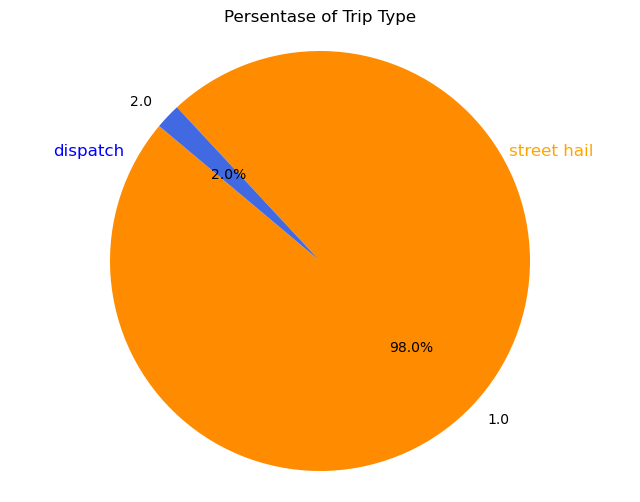

In [89]:
# Warna khusus untuk setiap potongan
colors = ['darkorange', 'royalblue']

# Membuat pie chart dengan warna khusus
plt.figure(figsize=(8, 6))
pie_chart = plt.pie(persentase, labels=count_trip_type.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Persentase of Trip Type')

# Menambahkan label "street hail" di samping potongan pertama
plt.text(1.1, 0.5, 'street hail', ha='center', fontsize=12, color='orange')

# Menambahkan label "dispatch" di samping potongan kedua
plt.text(-1.1, 0.5, 'dispatch', ha='center', fontsize=12, color='blue')

plt.axis('equal')  # Agar pie chart terlihat seperti lingkaran
plt.show()

Penjelasan :
<br> Dari hasil diatas terlihat sangat jauh perbandingan frekuensi perjalan dengan type 1 dan 2.
<br> - Type 1 (Street Hail) memiliki persentase hampir 98%
<br> - Type 2 (Dispatch) memiliki persentase hanya 2%
<br>Hal ini sangat menarik. Mengapa banyak perjalanan yang bertipe `street-hail` (penjemputan langsung dijalan) daripada perjalanan bertipe `dispatch` (Pengiriman Panggilan/Aplikasi tertentu) padahal dengan pemesanan dispatch (melalui telpon/aplikasi) lebih mudah/prkatis. 

## 3.Persebaran Trip Type berdasarkan borough
kolom `trip_distance`, `fare_amount`, `tip_amount`, `congestion_surcharge`, `total_amount`.

In [90]:
trip_type_by_boroughs = df_merge.groupby(['borough','trip_type']).size().reset_index(name='Number Of Trip Type').sort_values(by='Number Of Trip Type', ascending=False)
total_trip_type = trip_type_by_boroughs['Number Of Trip Type'].sum()

# Hitung persentase setiap nilai dalam kolom 'Number Of Trip Type' terhadap total jumlahnya
trip_type_by_boroughs['Percentage'] = (trip_type_by_boroughs['Number Of Trip Type'] / total_trip_type) * 100
trip_type_by_boroughs

,borough,trip_type,Number Of Trip Type,Percentage
5,Manhattan,1.0,39121,57.643627
7,Queens,1.0,17251,25.418834
2,Brooklyn,1.0,9023,13.295121
0,Bronx,1.0,1130,1.665021
8,Queens,2.0,705,1.038796
3,Brooklyn,2.0,286,0.421412
6,Manhattan,2.0,240,0.353633
1,Bronx,2.0,98,0.144400
9,Staten Island,1.0,11,0.016208
4,EWR,2.0,1,0.001473


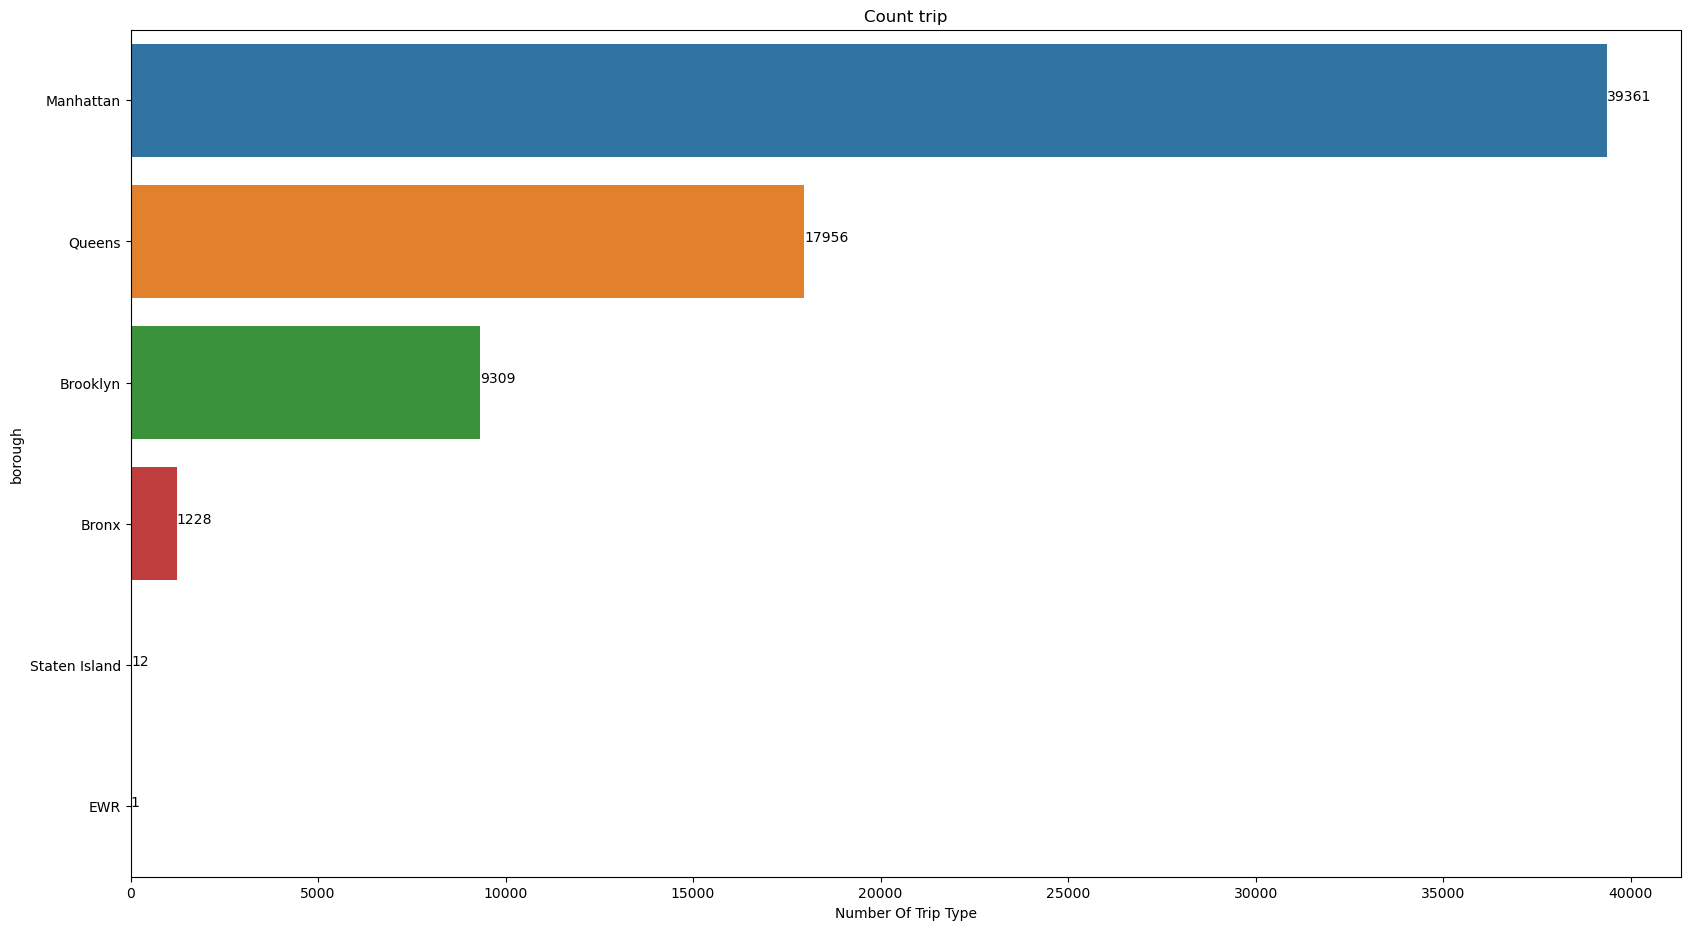

In [91]:
trip_type_by_boroughs = df_merge.groupby('borough').size().reset_index(name='Number Of Trip Type').sort_values(by='Number Of Trip Type', ascending=False)
# Menggambar Plot
plt.figure(figsize=(20, 11))  # Atur ukuran plot
sns.barplot(data=trip_type_by_boroughs, x='Number Of Trip Type', y='borough', orient='h')

# Menambahkan presentase di setiap bar
for index, value in enumerate(trip_type_by_boroughs['Number Of Trip Type']):
    plt.text(value, index, f'{value}', color='black', ha="left")

plt.xlabel('Number Of Trip Type')  # Label sumbu x
plt.ylabel('borough')  # Label sumbu y
plt.title('Count trip')  # Judul plot
plt.show()

In [92]:
a_by_trip_type1 = df_merge[df_merge['trip_type'] == 1].groupby(['borough', 'trip_type'])[['trip_type']].count()
a_by_trip_type1 = a_by_trip_type1.rename(columns={'trip_type': 'Count of Trip'})
a_by_trip_type1 = a_by_trip_type1.sort_values(by='Count of Trip', ascending=False)

a_by_trip_type2 = df_merge[df_merge['trip_type'] == 2].groupby(['borough', 'trip_type'])[['trip_type']].count()
a_by_trip_type2 = a_by_trip_type2.rename(columns={'trip_type': 'Count of Trip'})
a_by_trip_type2 = a_by_trip_type2.sort_values(by='Count of Trip', ascending=False)

display(a_by_trip_type1)
display(a_by_trip_type2)

,,Count of Trip
borough,trip_type,
Manhattan,1.0,39121
Queens,1.0,17251
Brooklyn,1.0,9023
Bronx,1.0,1130
Staten Island,1.0,11


,,Count of Trip
borough,trip_type,
Queens,2.0,705
Brooklyn,2.0,286
Manhattan,2.0,240
Bronx,2.0,98
EWR,2.0,1
Staten Island,2.0,1


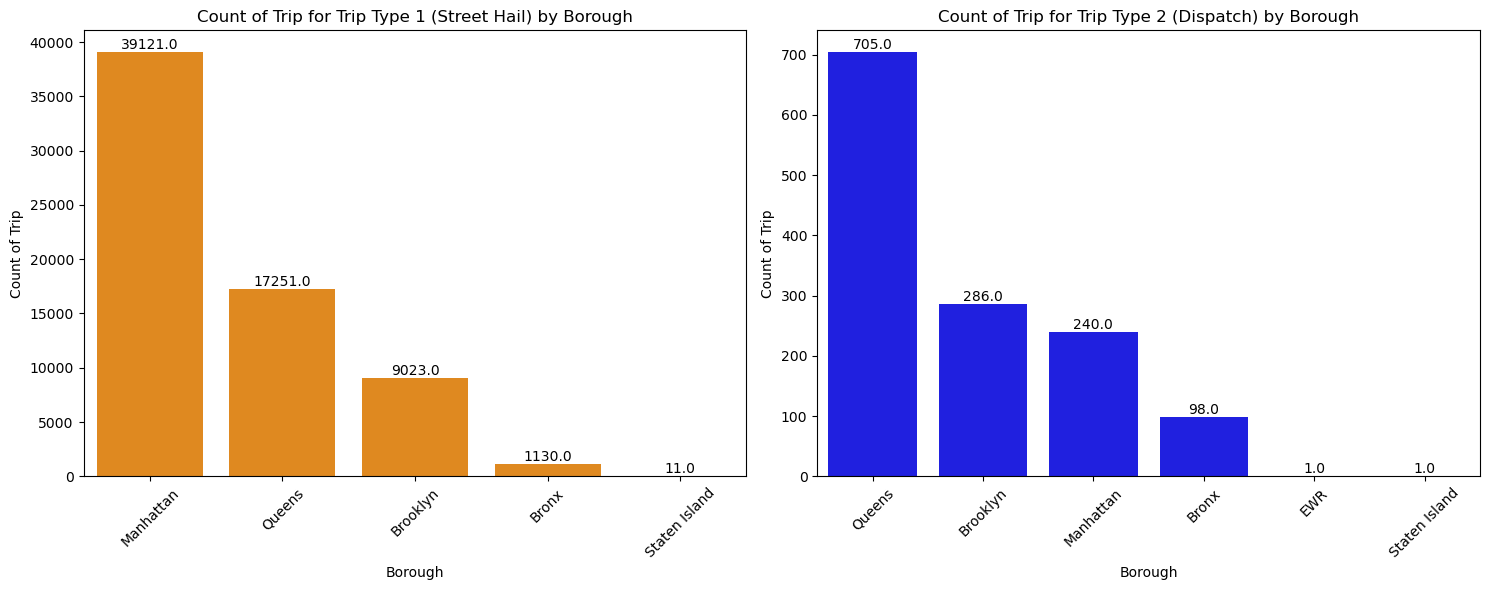

In [126]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Plot barplot untuk Street Hail
plt.figure(figsize=(15, 6))

# Subplot untuk Street Hail
plt.subplot(1, 2, 1)
barplot1 = sns.barplot(x=a_by_trip_type1.index.get_level_values('borough'), 
                       y='Count of Trip', 
                       data=a_by_trip_type1, 
                       color='darkorange')
plt.title('Count of Trip for Trip Type 1 (Street Hail) by Borough')
plt.xlabel('Borough')
plt.ylabel('Count of Trip')
plt.xticks(rotation=45)

# Menambahkan label rata-rata trip distance pada setiap bar untuk Street Hail
for bar in barplot1.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2), 
             ha='center', va='bottom')

# Plot barplot untuk Dispatch
plt.subplot(1, 2, 2)
barplot2 = sns.barplot(x=a_by_trip_type2.index.get_level_values('borough'), 
                       y='Count of Trip', 
                       data=a_by_trip_type2, 
                       color='blue')
plt.title('Count of Trip for Trip Type 2 (Dispatch) by Borough')
plt.xlabel('Borough')
plt.ylabel('Count of Trip')
plt.xticks(rotation=45)

# Menambahkan label rata-rata trip distance pada setiap bar untuk Dispatch
for bar in barplot2.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2), 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


Penjelasan : 
* Tiga borough dengan penggunaan trip type `street hail` terbanyak :
  <br>1.`Manhattan` sebanyak `39121` dengan persentase `57.64%`.
  <br>2.`Quenss` sebanyak `17251` dengan persentase `25.4%` .
  <br>3.`Brooklyn` sebanyak `9023` dengan persentase `13.30%`.

* Tiga borough dengan penggunaan trip type `dispatch` terbanyak :
  <br>1.`Queens` sebanyak `705` dengan persentase `1.038%`.
  <br>2.`Brooklyn` sebanyak `286` dengan persentase `0.42%` .
  <br>3.`Manhattan ` sebanyak `240` dengan persentase `0.35%`.

* Dapat dilihat berdasarkan banyaknya perjalanan. Borough `Manhattan` dan `Queens` merupakan 2 borough yang memiliki number of trip type terbanyak. Mengartikan bahwa 2 borough tersebut memiliki kepadatan transportasi yang tinggi.

## 4.`Rata - rata Trip Distance` berdasarkan pemesanan `trip type` di setiap borough

In [94]:
# Group data by 'borough' and 'trip_type', then calculate the mean of 'trip_distance'
avg_trip_distance_by_trip_type1 = df_merge[df_merge['trip_type'] == 1].groupby(['borough', 'trip_type'])[['trip_distance']].mean()
# Sort the result by 'borough' in ascending order
avg_trip_distance_by_trip_type1 = avg_trip_distance_by_trip_type1.sort_values(by='trip_distance', ascending=False)
avg_trip_distance_by_trip_type1 = avg_trip_distance_by_trip_type1.rename(columns={'trip_distance': 'Mean of Trip Distance'})

# Group data by 'borough' and 'trip_type', then calculate the mean of 'trip_distance'
avg_trip_distance_by_trip_type2 = df_merge[df_merge['trip_type'] == 2].groupby(['borough', 'trip_type'])[['trip_distance']].mean()
# Sort the result by 'borough' in ascending order
avg_trip_distance_by_trip_type2 = avg_trip_distance_by_trip_type2.sort_values(by='trip_distance', ascending=False)
avg_trip_distance_by_trip_type2 = avg_trip_distance_by_trip_type2.rename(columns={'trip_distance': 'Mean of Trip Distance'})

# Display the result
print('1 = Street Hail')
display(avg_trip_distance_by_trip_type1)
print('2 = Dispatch')
display(avg_trip_distance_by_trip_type2)


1 = Street Hail


,,Mean of Trip Distance
borough,trip_type,
Bronx,1.0,116.032221
Brooklyn,1.0,12.888758
Manhattan,1.0,5.693549
Queens,1.0,4.606022
Staten Island,1.0,2.979091


2 = Dispatch


,,Mean of Trip Distance
borough,trip_type,
Brooklyn,2.0,3.629755
Manhattan,2.0,3.000292
Queens,2.0,2.315177
Bronx,2.0,1.053878
EWR,2.0,0.000000
Staten Island,2.0,0.000000


In [95]:
# Group data by 'trip_type' and calculate the mean of 'trip_distance'
avg_trip_distance_by_trip_type = df_merge.groupby('trip_type')[['trip_distance']].mean()

# Tampilkan hasil
display(avg_trip_distance_by_trip_type)


,trip_distance
trip_type,
1.0,8.260795
2.0,2.624838


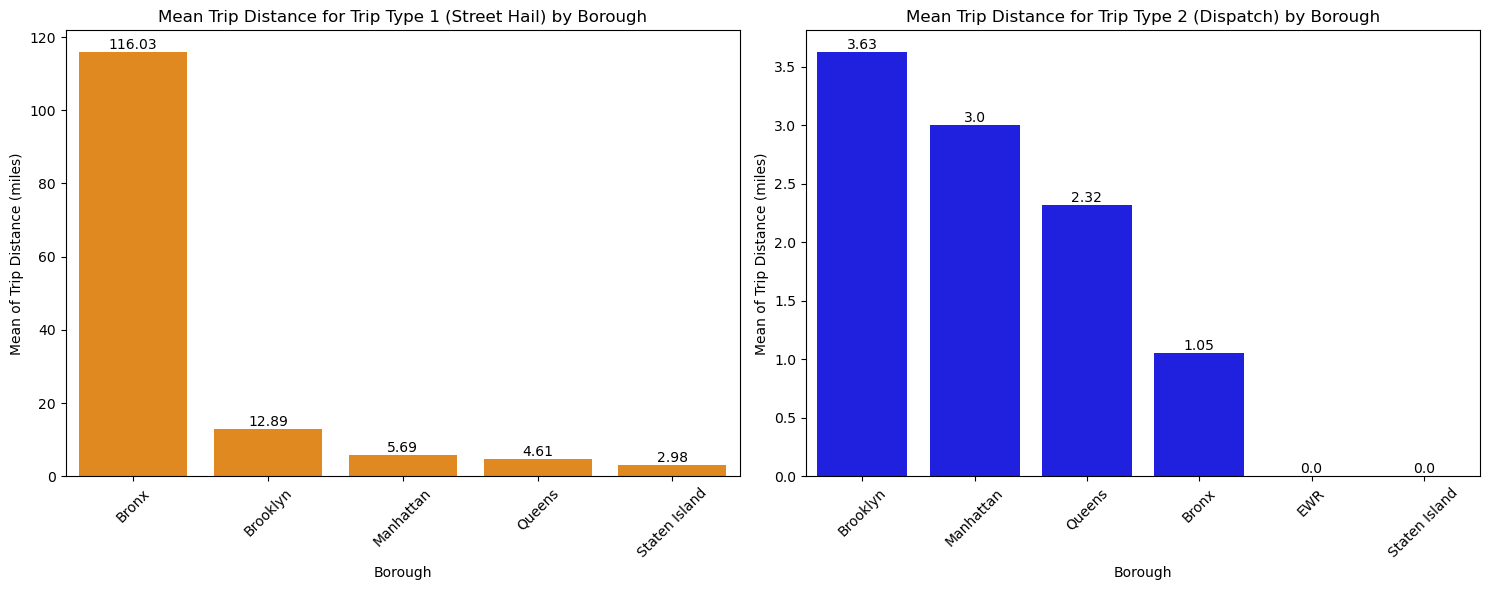

In [125]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Plot barplot untuk Street Hail
plt.figure(figsize=(15, 6))

# Subplot untuk Street Hail
plt.subplot(1, 2, 1)
barplot1 = sns.barplot(x=avg_trip_distance_by_trip_type1.index.get_level_values('borough'), 
                       y='Mean of Trip Distance', 
                       data=avg_trip_distance_by_trip_type1, 
                       color='darkorange')
plt.title('Mean Trip Distance for Trip Type 1 (Street Hail) by Borough')
plt.xlabel('Borough')
plt.ylabel('Mean of Trip Distance (miles)')
plt.xticks(rotation=45)

# Menambahkan label rata-rata trip distance pada setiap bar untuk Street Hail
for bar in barplot1.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2), 
             ha='center', va='bottom')

# Plot barplot untuk Dispatch
plt.subplot(1, 2, 2)
barplot2 = sns.barplot(x=avg_trip_distance_by_trip_type2.index.get_level_values('borough'), 
                       y='Mean of Trip Distance', 
                       data=avg_trip_distance_by_trip_type2, 
                       color='blue')
plt.title('Mean Trip Distance for Trip Type 2 (Dispatch) by Borough')
plt.xlabel('Borough')
plt.ylabel('Mean of Trip Distance (miles)')
plt.xticks(rotation=45)

# Menambahkan label rata-rata trip distance pada setiap bar untuk Dispatch
for bar in barplot2.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2), 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### Penjelasan :
* Tiga borough dengan `rata rata trip distance` tertinggi berdasarkan pemesanan trip type `street hail` di setiap `borough`:
  <br>1.`Bronx` sebesar `116.03`.
  <br>2.`Brooklyn` sebanyak `12.89`.
  <br>3.`Manhattan` sebanyak `5.69`.

* Tiga borough dengan `rata rata trip distance` tertinggi berdasarkan pemesanan trip type `dispatch` di setiap `borough`:
  <br>1.`Brooklyn` sebesar `3.63`.
  <br>2.`Manhattan` sebanyak `3.0`.
  <br>3.`Queens` sebanyak `2.32`.

* Dapat dilihat rata rata trip distance berdasarkan street hail `Bronx` paling tinggi, padahal sebelumnya jika dilihat dari number of street hail `Manhattan` tertingi tetapi rata rata trip distance `Manhattan` ke-3. Menandakan bahwa karakteristik perjalanan di `Manhattan` yaitu penjelanan jarak dekat.  
* Sama seperti `Street Hail`, Dapat dilihat rata rata trip distance berdasarkan dispatch `Brooklyn` paling tinggi, padahal sebelumnya jika dilihat dari number of street hail `Queens` tertingi tetapi rata rata trip distance `Queens` ke-3. Menandakan bahwa karakteristik perjalanan di `Queens` yaitu penjelanan jarak dekat.
* Mencerminkan walaupun catatan perjalan terbanyak di borough `Manhattan` dan `Queens` tetapi `rata rata trip distance` tidak terlalu tinggi dan ini memungkinkan akan mempengaruhi `total amount` yang didapat setiap perjalanan.

## 5.`Rata - rata Tip Amount` berdasarkan pemesanan `trip type` di setiap borough

In [97]:
# Group data by 'borough' and 'trip_type', then calculate the mean of 'trip_distance'
avg_tip_amount_by_trip_type1 = df_merge[df_merge['trip_type'] == 1].groupby(['borough', 'trip_type'])[['tip_amount']].mean()
# Sort the result by 'borough' in ascending order
avg_tip_amount_by_trip_type1 = avg_tip_amount_by_trip_type1.sort_values(by='tip_amount', ascending=False)
avg_tip_amount_by_trip_type1 = avg_tip_amount_by_trip_type1.rename(columns={'tip_amount': 'Mean of Tip Amount'})

# Group data by 'borough' and 'trip_type', then calculate the mean of 'trip_distance'
avg_tip_amount_by_trip_type2 = df_merge[df_merge['trip_type'] == 2].groupby(['borough', 'trip_type'])[['tip_amount']].mean()
# Sort the result by 'borough' in ascending order
avg_tip_amount_by_trip_type2 = avg_tip_amount_by_trip_type2.sort_values(by='tip_amount', ascending=False)
avg_tip_amount_by_trip_type2 = avg_tip_amount_by_trip_type2.rename(columns={'tip_amount': 'Mean of Tip Amount'})

# Display the result
print('1 = Street Hail')
display(avg_tip_amount_by_trip_type1)
print('2 = Dispatch')
display(avg_tip_amount_by_trip_type2)


1 = Street Hail


,,Mean of Tip Amount
borough,trip_type,
Brooklyn,1.0,2.731703
Manhattan,1.0,2.279242
Queens,1.0,1.601883
Staten Island,1.0,1.114545
Bronx,1.0,0.730000


2 = Dispatch


,,Mean of Tip Amount
borough,trip_type,
EWR,2.0,19.000000
Brooklyn,2.0,5.648357
Queens,2.0,1.845433
Bronx,2.0,0.922143
Manhattan,2.0,0.859083
Staten Island,2.0,0.000000


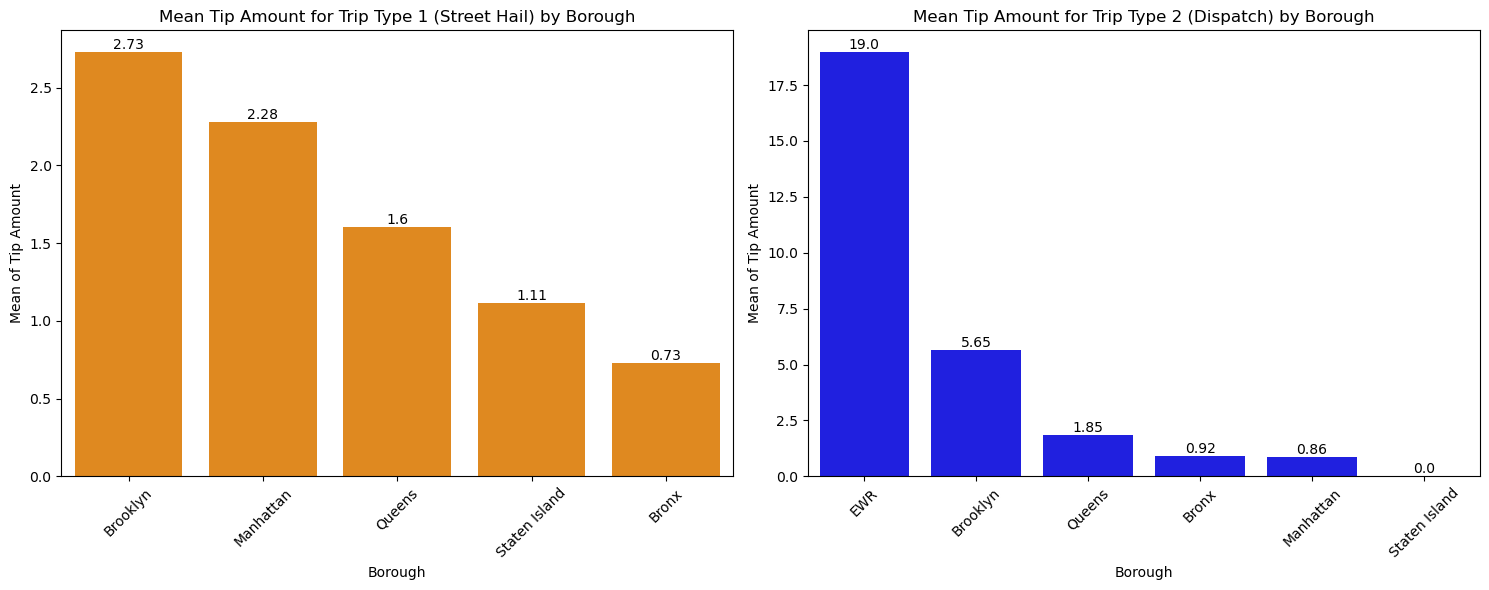

In [124]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Plot barplot untuk Street Hail
plt.figure(figsize=(15, 6))

# Subplot untuk Street Hail
plt.subplot(1, 2, 1)
barplot1 = sns.barplot(x=avg_tip_amount_by_trip_type1.index.get_level_values('borough'), 
                       y='Mean of Tip Amount', 
                       data=avg_tip_amount_by_trip_type1, 
                       color='darkorange')
plt.title('Mean Tip Amount for Trip Type 1 (Street Hail) by Borough')
plt.xlabel('Borough')
plt.ylabel('Mean of Tip Amount')
plt.xticks(rotation=45)

# Menambahkan label rata-rata trip distance pada setiap bar untuk Street Hail
for bar in barplot1.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2), 
             ha='center', va='bottom')

# Plot barplot untuk Dispatch
plt.subplot(1, 2, 2)
barplot2 = sns.barplot(x=avg_tip_amount_by_trip_type2.index.get_level_values('borough'), 
                       y='Mean of Tip Amount', 
                       data=avg_tip_amount_by_trip_type2, 
                       color='blue')
plt.title('Mean Tip Amount for Trip Type 2 (Dispatch) by Borough')
plt.xlabel('Borough')
plt.ylabel('Mean of Tip Amount')
plt.xticks(rotation=45)

# Menambahkan label rata-rata trip distance pada setiap bar untuk Dispatch
for bar in barplot2.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2), 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### Penjelasan :
* Tiga borough dengan `rata rata tip amount` tertinggi berdasarkan pemesanan trip type `street hail` di setiap `borough`:
  <br>1.`Brooklyn` sebesar `2.73`.
  <br>2.`Manhattan` sebanyak `2.28`.
  <br>3.`Queens` sebanyak `1.6`.

* Tiga borough dengan `rata rata tip amount` tertinggi berdasarkan pemesanan trip type `dispatch` di setiap `borough`:
  <br>1.`EWR` sebesar `19.0`.
  <br>2.`Brooklyn` sebanyak `5.65`.
  <br>3.`Queens` sebanyak `1.85`.

* Berdasarkan trip type street hail, borough `Brooklyn` memiliki rata rata `tip amount`tertinggi yaitu `2.73`. Jika dikorelasikan data sebelumnya rata rata trip distance `Brooklyn` yaitu `12.89` di urutan ke-2 maka mencerminkan behaviour penumpang trip type steet hail di borough `Brooklyn` cukup royal kepada driver.
* Berdasarkan trip type street hail, borough `Bronx` memiliki rata rata `tip amount`terendah yaitu `0.73`. Jika dikorelasikan data sebelumnya rata rata trip distance `Bronx` yaitu `116.03` di urutan ke-1 maka mencerminkan behaviour penumpang trip type steet hail di borough `Bronx` tidak cukup royal kepada driver.
* Menghiligh borough `Queens` yang memiliki rata rata tip amount ke-3 berdasarkan street hail dan dispatch mencerminkan behaviour penumpang di `Queens` cukup royal. 

## 6.`Rata - rata Fare Amount` berdasarkan pemesanan `trip type` di setiap borough

In [99]:
# Group data by 'borough' and 'trip_type', then calculate the mean of 'trip_distance'
avg_fare_amount_by_trip_type1 = df_merge[df_merge['trip_type'] == 1].groupby(['borough', 'trip_type'])[['fare_amount']].mean()
# Sort the result by 'borough' in ascending order
avg_fare_amount_by_trip_type1 = avg_fare_amount_by_trip_type1.sort_values(by='fare_amount', ascending=False)
avg_fare_amount_by_trip_type1 = avg_fare_amount_by_trip_type1.rename(columns={'fare_amount': 'Mean of Fare Amount'})

# Group data by 'borough' and 'trip_type', then calculate the mean of 'trip_distance'
avg_fare_amount_by_trip_type2 = df_merge[df_merge['trip_type'] == 2].groupby(['borough', 'trip_type'])[['fare_amount']].mean()
# Sort the result by 'borough' in ascending order
avg_fare_amount_by_trip_type2 = avg_fare_amount_by_trip_type2.sort_values(by='fare_amount', ascending=False)
avg_fare_amount_by_trip_type2 = avg_fare_amount_by_trip_type2.rename(columns={'fare_amount': 'Mean of Fare Amount'})

# Display the result
print('1 = Street Hail')
display(avg_fare_amount_by_trip_type1)
print('2 = Dispatch')
display(avg_fare_amount_by_trip_type2)


1 = Street Hail


,,Mean of Fare Amount
borough,trip_type,
Staten Island,1.0,24.354545
Bronx,1.0,21.763956
Brooklyn,1.0,20.509645
Queens,1.0,16.997986
Manhattan,1.0,14.957504


2 = Dispatch


,,Mean of Fare Amount
borough,trip_type,
EWR,2.0,180.000000
Staten Island,2.0,109.250000
Brooklyn,2.0,38.744406
Queens,2.0,30.969816
Bronx,2.0,22.016020
Manhattan,2.0,21.362875


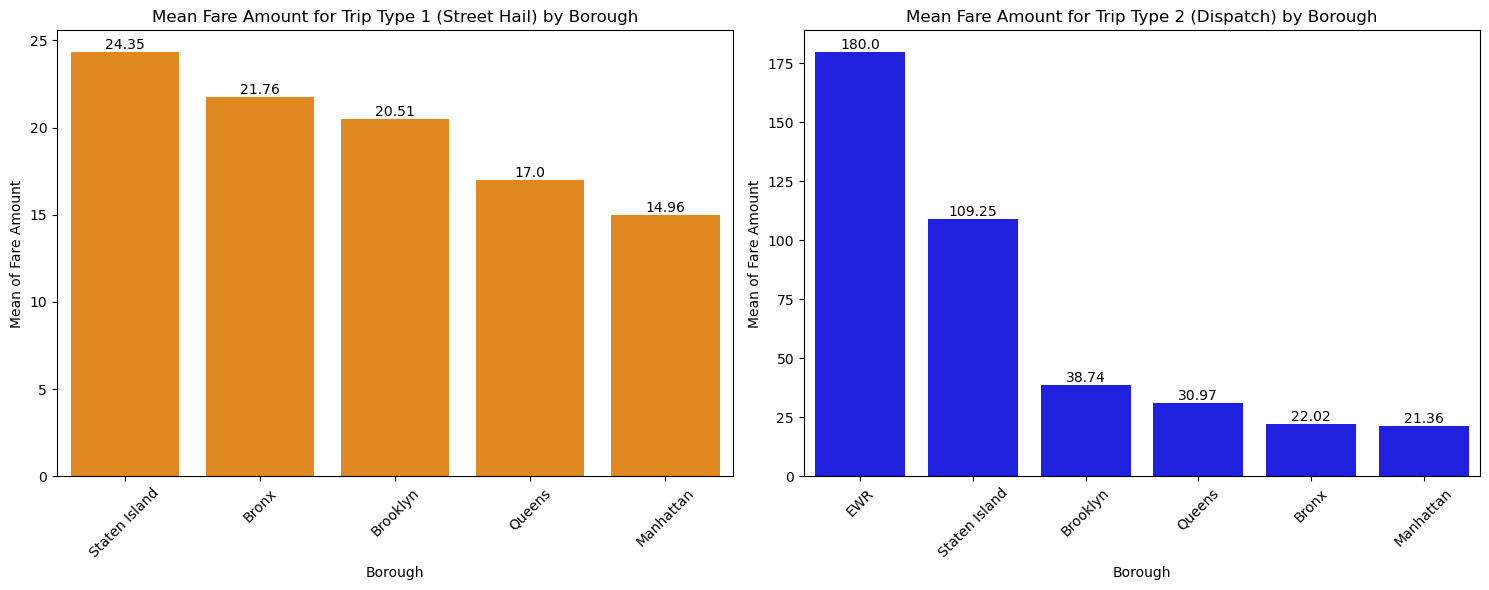

In [123]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Plot barplot untuk Street Hail
plt.figure(figsize=(15, 6))

# Subplot untuk Street Hail
plt.subplot(1, 2, 1)
barplot1 = sns.barplot(x=avg_fare_amount_by_trip_type1.index.get_level_values('borough'), 
                       y='Mean of Fare Amount', 
                       data=avg_fare_amount_by_trip_type1, 
                       color='darkorange')
plt.title('Mean Fare Amount for Trip Type 1 (Street Hail) by Borough')
plt.xlabel('Borough')
plt.ylabel('Mean of Fare Amount')
plt.xticks(rotation=45)

# Menambahkan label rata-rata trip distance pada setiap bar untuk Street Hail
for bar in barplot1.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2), 
             ha='center', va='bottom')

# Plot barplot untuk Dispatch
plt.subplot(1, 2, 2)
barplot2 = sns.barplot(x=avg_fare_amount_by_trip_type2.index.get_level_values('borough'), 
                       y='Mean of Fare Amount', 
                       data=avg_fare_amount_by_trip_type2, 
                       color='blue')
plt.title('Mean Fare Amount for Trip Type 2 (Dispatch) by Borough')
plt.xlabel('Borough')
plt.ylabel('Mean of Fare Amount')
plt.xticks(rotation=45)

# Menambahkan label rata-rata trip distance pada setiap bar untuk Dispatch
for bar in barplot2.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2), 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### Penjelasan :
* Tiga borough dengan `rata rata fare amount` tertinggi berdasarkan pemesanan trip type `street hail` di setiap `borough`:
  <br>1.`Staten Island` sebesar `24.35`.
  <br>2.`Bronx` sebanyak `21.76`.
  <br>3.`Brooklyn` sebanyak `20.51`.

* Tiga borough dengan `rata rata fare amount` tertinggi berdasarkan pemesanan trip type `dispatch` di setiap `borough`:
  <br>1.`EWR` sebesar `180.0`.
  <br>2.`Staten Island` sebanyak `109.25`.
  <br>3.`Brooklyn` sebanyak `38.74`.

* Pada trip type `Street hail`, borough `Staten Island` memiliki rata rata fare amount sebesar `24.35` `tertinggi` dikarenakan staten island merupakan daerah pinggiran new york namun sangat ekslusif dari segi pariwisata.
* Pada trip type `Dispatch`, borough `EWR` memiliki rata rata fare amount sebesar `180.0` `tertinggi` dikarenakan tarif dasar ke airport international ada biaya tambahan airport.
* Melihat rata rata fare amount paling rendah yaitu borough `Manhattan`. `Manhattan` banyak perjalanan dalam kota atau sekitarnya hanya melibatkan jarak pendek. Ini dapat menghasilkan fare amount yang relatif rendah meskipun tertinggi dalam frekuensi  perjalanan.

## 7.`Rata - rata Congestion Surcharger` berdasarkan pemesanan `trip type` di setiap borough

In [101]:
# Group data by 'borough' and 'trip_type', then calculate the mean of 'trip_distance'
avg_congestion_surcharge_by_trip_type1 = df_merge[df_merge['trip_type'] == 1].groupby(['borough', 'trip_type'])[['congestion_surcharge']].mean()
# Sort the result by 'borough' in ascending order
avg_congestion_surcharge_by_trip_type1 = avg_congestion_surcharge_by_trip_type1.sort_values(by='congestion_surcharge', ascending=False)
avg_congestion_surcharge_by_trip_type1 = avg_congestion_surcharge_by_trip_type1.rename(columns={'congestion_surcharge': 'Mean of Congestion Surcharge'})

# Group data by 'borough' and 'trip_type', then calculate the mean of 'trip_distance'
avg_congestion_surcharge_by_trip_type2 = df_merge[df_merge['trip_type'] == 2].groupby(['borough', 'trip_type'])[['congestion_surcharge']].mean()
# Sort the result by 'borough' in ascending order
avg_congestion_surcharge_by_trip_type2 = avg_congestion_surcharge_by_trip_type2.sort_values(by='congestion_surcharge', ascending=False)
avg_congestion_surcharge_by_trip_type2 = avg_congestion_surcharge_by_trip_type2.rename(columns={'congestion_surcharge': 'Mean of Congestion Surcharge'})

# Display the result
print('1 = Street Hail')
display(avg_congestion_surcharge_by_trip_type1)
print('2 = Dispatch')
display(avg_congestion_surcharge_by_trip_type2)


1 = Street Hail


,,Mean of Congestion Surcharge
borough,trip_type,
Manhattan,1.0,1.046746
Brooklyn,1.0,0.367865
Queens,1.0,0.104994
Bronx,1.0,0.063274
Staten Island,1.0,0.000000


2 = Dispatch


,,Mean of Congestion Surcharge
borough,trip_type,
Manhattan,2.0,0.446875
Brooklyn,2.0,0.403846
Queens,2.0,0.089716
Bronx,2.0,0.000000
EWR,2.0,0.000000
Staten Island,2.0,0.000000


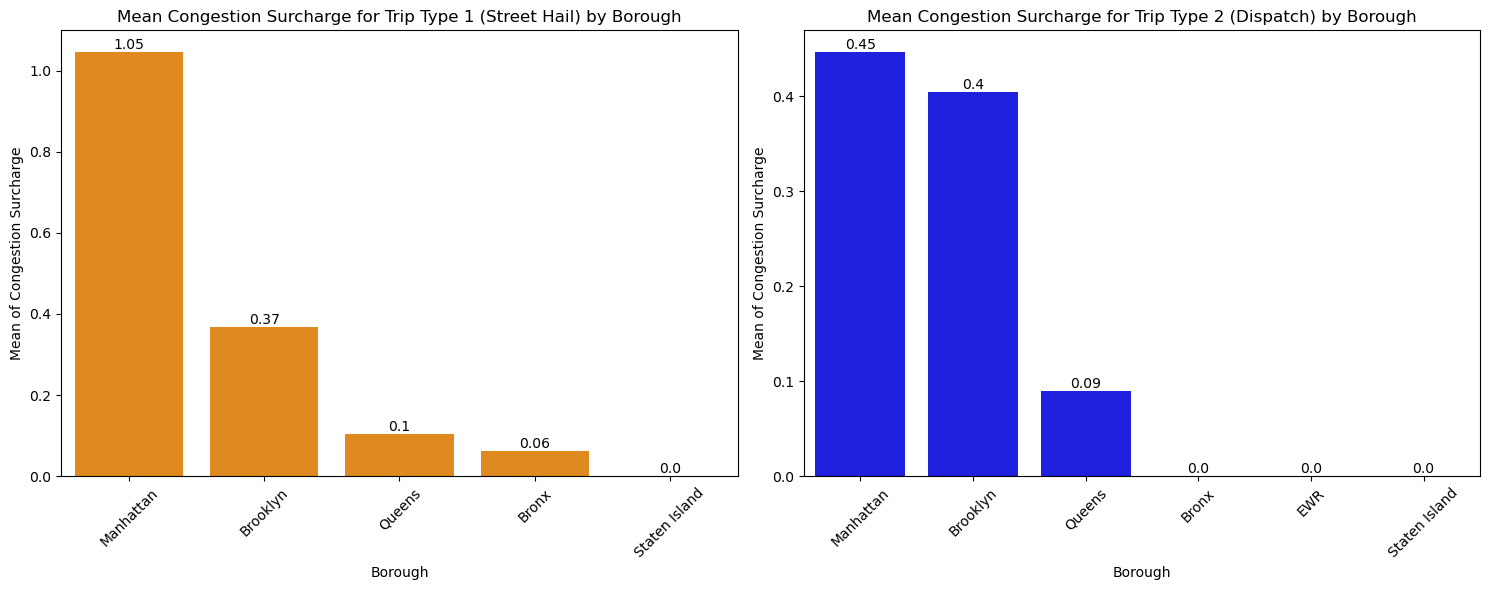

In [122]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Plot barplot untuk Street Hail
plt.figure(figsize=(15, 6))

# Subplot untuk Street Hail
plt.subplot(1, 2, 1)
barplot1 = sns.barplot(x=avg_congestion_surcharge_by_trip_type1.index.get_level_values('borough'), 
                       y='Mean of Congestion Surcharge', 
                       data=avg_congestion_surcharge_by_trip_type1, 
                       color='darkorange')
plt.title('Mean Congestion Surcharge for Trip Type 1 (Street Hail) by Borough')
plt.xlabel('Borough')
plt.ylabel('Mean of Congestion Surcharge')
plt.xticks(rotation=45)

# Menambahkan label rata-rata trip distance pada setiap bar untuk Street Hail
for bar in barplot1.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2), 
             ha='center', va='bottom')

# Plot barplot untuk Dispatch
plt.subplot(1, 2, 2)
barplot2 = sns.barplot(x=avg_congestion_surcharge_by_trip_type2.index.get_level_values('borough'), 
                       y='Mean of Congestion Surcharge', 
                       data=avg_congestion_surcharge_by_trip_type2, 
                       color='blue')
plt.title('Mean Congestion Surcharge for Trip Type 2 (Dispatch) by Borough')
plt.xlabel('Borough')
plt.ylabel('Mean of Congestion Surcharge')
plt.xticks(rotation=45)

# Menambahkan label rata-rata trip distance pada setiap bar untuk Dispatch
for bar in barplot2.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2), 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### Penjelasan :
* Tiga borough dengan `rata rata congestion surcharge` tertinggi berdasarkan pemesanan trip type `street hail` di setiap `borough`:
  <br>1.`Manhattan` sebesar `1.05`.
  <br>2.`Brooklyn` sebanyak `0.37`.
  <br>3.`Queens` sebanyak `0.1`.

* Tiga borough dengan `rata rata congestion surcharge` tertinggi berdasarkan pemesanan trip type `dispatch` di setiap `borough`:
  <br>1.`Manhattan` sebesar `0.45`.
  <br>2.`Brooklyn` sebanyak `0.4`.
  <br>3.`Queens` sebanyak `0.09`.

* Melihat rata rata congestion surcharge 3 tertinggi berdasarkan street hail dan dispatch diisi oleh borough yang sama. Data tersebut mencerminkan bahwa borough tersebut merupakan daerah dengan kemacetan yang tinggi.


## 8.`Rata - rata Total Amount` berdasarkan pemesanan `trip type` di setiap borough

In [103]:
avg_type1 = df_merge[df_merge['trip_type'] == 1][['total_amount']].mean()
display(avg_type1)

total_amount    21.592557
dtype: float64

In [104]:
avg_type2= df_merge[df_merge['trip_type'] == 2][['total_amount']].mean()
display(avg_type2)

total_amount    34.249016
dtype: float64

In [105]:
# Group data by 'borough' and 'trip_type', then calculate the mean of 'trip_distance'
avg_total_amount_by_trip_type1 = df_merge[df_merge['trip_type'] == 1].groupby(['borough', 'trip_type'])[['total_amount']].mean()
# Sort the result by 'borough' in ascending order
avg_total_amount_by_trip_type1 = avg_total_amount_by_trip_type1.sort_values(by='total_amount', ascending=False)
avg_total_amount_by_trip_type1 = avg_total_amount_by_trip_type1.rename(columns={'total_amount': 'Mean of Total Amount'})

# Group data by 'borough' and 'trip_type', then calculate the mean of 'trip_distance'
avg_total_amount_by_trip_type2 = df_merge[df_merge['trip_type'] == 2].groupby(['borough', 'trip_type'])[['total_amount']].mean()
# Sort the result by 'borough' in ascending order
avg_total_amount_by_trip_type2 = avg_total_amount_by_trip_type2.sort_values(by='total_amount', ascending=False)
avg_total_amount_by_trip_type2 = avg_total_amount_by_trip_type2.rename(columns={'total_amount': 'Mean of Total Amount'})

# Display the result
print('1 = Street Hail')
display(avg_total_amount_by_trip_type1)
print('2 = Dispatch')
display(avg_total_amount_by_trip_type2)

1 = Street Hail


,,Mean of Total Amount
borough,trip_type,
Staten Island,1.0,30.837273
Brooklyn,1.0,25.867737
Bronx,1.0,24.957540
Queens,1.0,21.360990
Manhattan,1.0,20.608832


2 = Dispatch


,,Mean of Total Amount
borough,trip_type,
EWR,2.0,200.000000
Staten Island,2.0,110.250000
Brooklyn,2.0,46.242587
Queens,2.0,34.081773
Bronx,2.0,23.934592
Manhattan,2.0,23.652375


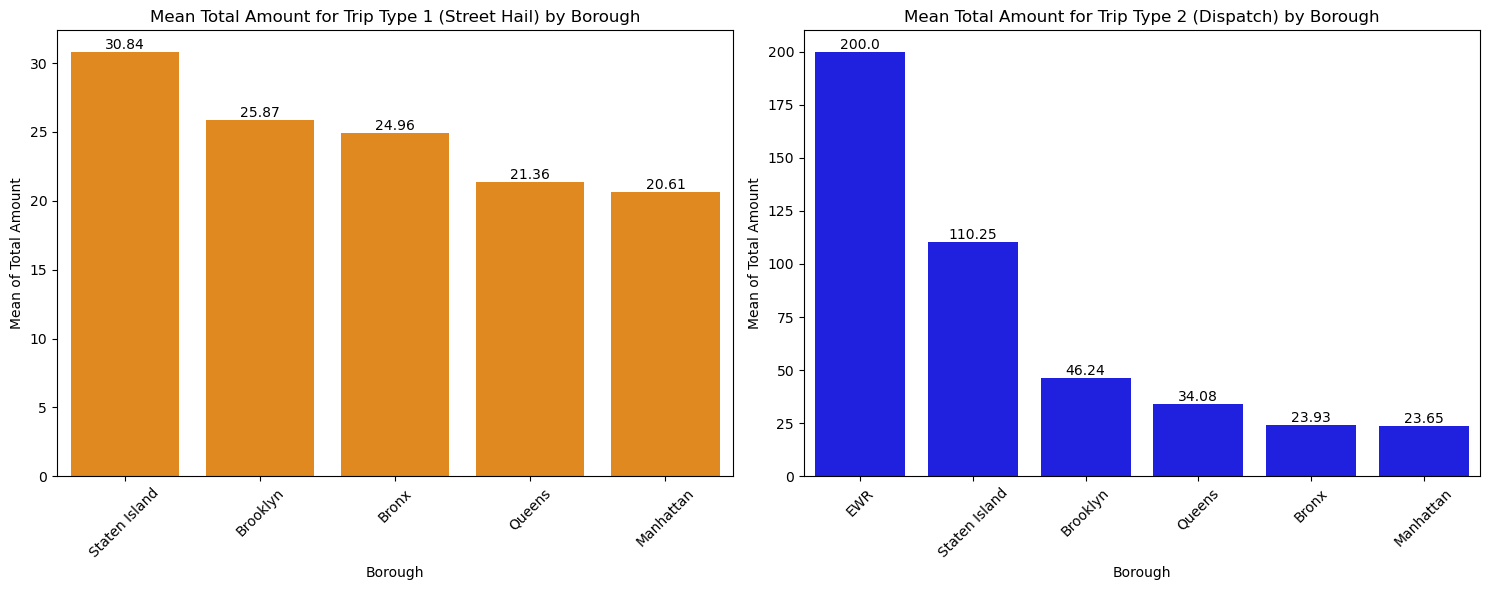

In [121]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Plot barplot untuk Street Hail
plt.figure(figsize=(15, 6))

# Subplot untuk Street Hail
plt.subplot(1, 2, 1)
barplot1 = sns.barplot(x=avg_total_amount_by_trip_type1.index.get_level_values('borough'), 
                       y='Mean of Total Amount', 
                       data=avg_total_amount_by_trip_type1, 
                       color='darkorange')
plt.title('Mean Total Amount for Trip Type 1 (Street Hail) by Borough')
plt.xlabel('Borough')
plt.ylabel('Mean of Total Amount')
plt.xticks(rotation=45)

# Menambahkan label rata-rata total amount pada setiap bar untuk Street Hail
for bar in barplot1.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2), 
             ha='center', va='bottom')

# Plot barplot untuk Dispatch
plt.subplot(1, 2, 2)
barplot2 = sns.barplot(x=avg_total_amount_by_trip_type2.index.get_level_values('borough'), 
                       y='Mean of Total Amount', 
                       data=avg_total_amount_by_trip_type2, 
                       color='blue')
plt.title('Mean Total Amount for Trip Type 2 (Dispatch) by Borough')
plt.xlabel('Borough')
plt.ylabel('Mean of Total Amount')
plt.xticks(rotation=45)

# Menambahkan label rata-rata total amount pada setiap bar untuk Dispatch
for bar in barplot2.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2), 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### Penjelasan :
* Tiga borough dengan `rata rata total amount` tertinggi berdasarkan pemesanan trip type `street hail` di setiap `borough`:
  <br>1.`Staten Island` sebesar `30.84`.
  <br>2.`Brooklyn` sebanyak `25.87`.
  <br>3.`Bronx` sebanyak `24.96`.
  <br>4.`Queens` sebanyak `21.36`.
  <br>5.`Manhattan` sebanyak `20.61`.

* Tiga borough dengan `rata rata total amount` tertinggi berdasarkan pemesanan trip type `dispatch` di setiap `borough`:
  <br>1.`EWR` sebesar `200.0`.
  <br>2.`Staten Island` sebanyak `110.25`.
  <br>3.`Brooklyn` sebanyak `46.24`.
  <br>4.`Queens` sebanyak `34.08`.
  <br>5.`Bronx` sebanyak `23.93`.
  <br>6.`Manhattan` sebanyak `23.65`.

* Total amount tertinggi pada Trip Type street hail yaitu borough `Staten Island` sebesar `30.84`. 
* Total amount tertinggi pada Trip Type dispatch yaitu borough `EWR` sebesar `200.0`. 
* Melihat rata rata total amount paling rendah yaitu borough `Manhattan` berdasarkan trip type street hail sebesar `20.61` dan dispatch sebesar `23.65` mencerminkan bahwa di Manhattan perjalanan taxi cenderung lebih murah atau kurang menghasilkan pendapatan dibandingkan dengan borough lainnya. 
* Kepadatan populasi yang tinggi di Manhattan, di mana perjalanan taxi mungkin lebih sering digunakan untuk perjalanan jarak pendek di sekitar wilayah tersebut. 
* Trip type `street hail` lebih umum digunakan untuk perjalanan jarak pendek di sekitar wilayah Manhattan. 
* Ini menunjukkan bahwa orang-orang cenderung menggunakan taksi secara spontan di jalanan Manhattan untuk perjalanan singkat atau tujuan terdekat.
* Disebabkan oleh kepadatan populasi yang tinggi dan infrastruktur transportasi yang padat di Manhattan, membuat penggunaan taksi untuk perjalanan jarak pendek menjadi lebih praktis dan efisien.

## 9.`Rata - rata` berdasarkan pemesanan `trip type` di setiap borough

In [107]:
# Menghitung rata-rata tip_amount, fare_amount, congestion_surcharge, total_amount untuk trip_type = 1 berdasarkan borough
avg_amounts_trip_type_1 = df_merge[df_merge['trip_type'] == 1].groupby('borough')[['tip_amount', 'fare_amount', 'congestion_surcharge', 'total_amount']].mean().reset_index()

# Mengurutkan hasil berdasarkan total_amount secara menurun
avg_amounts_trip_type_1_sorted = avg_amounts_trip_type_1.sort_values(by='total_amount', ascending=False)

# Menampilkan hasil
display(avg_amounts_trip_type_1_sorted)


,borough,tip_amount,fare_amount,congestion_surcharge,total_amount
4,Staten Island,1.114545,24.354545,0.000000,30.837273
1,Brooklyn,2.731703,20.509645,0.367865,25.867737
0,Bronx,0.730000,21.763956,0.063274,24.957540
3,Queens,1.601883,16.997986,0.104994,21.360990
2,Manhattan,2.279242,14.957504,1.046746,20.608832


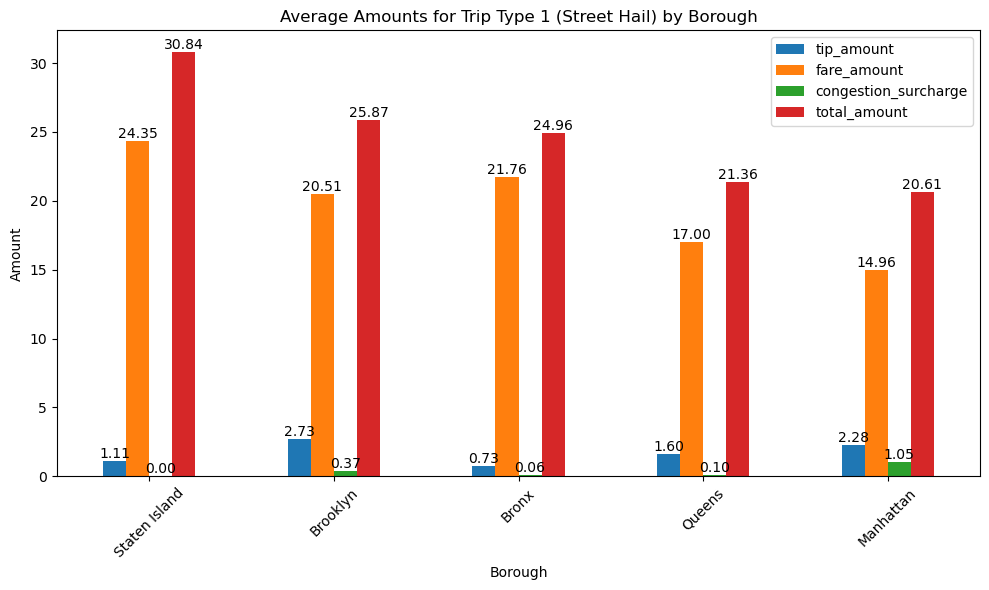

In [120]:
# import matplotlib.pyplot as plt

# Set up the figure and axis
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plotting the bars
bars = avg_amounts_trip_type_1_sorted.plot(kind='bar', x='borough', y=['tip_amount', 'fare_amount', 'congestion_surcharge', 'total_amount'], ax=ax)

# Adding labels and title
plt.title('Average Amounts for Trip Type 1 (Street Hail) by Borough')
plt.xlabel('Borough')
plt.ylabel('Amount')
plt.xticks(rotation=45)

# Add labels with mean value on each bar
for bar in bars.patches:
    # Get the height of the bar
    height = bar.get_height()
    # Add text label with mean value rounded to 2 decimal places
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


In [109]:
# Menghitung rata-rata tip_amount, fare_amount, congestion_surcharge, total_amount untuk trip_type = 1 berdasarkan borough
avg_amounts_trip_type_2 = df_merge[df_merge['trip_type'] == 2].groupby('borough')[['tip_amount', 'fare_amount', 'congestion_surcharge', 'total_amount']].mean().reset_index()

# Mengurutkan hasil berdasarkan total_amount secara menurun
avg_amounts_trip_type_2_sorted = avg_amounts_trip_type_2.sort_values(by='total_amount', ascending=False)

# Menampilkan hasil
display(avg_amounts_trip_type_2_sorted)


,borough,tip_amount,fare_amount,congestion_surcharge,total_amount
2,EWR,19.000000,180.000000,0.000000,200.000000
5,Staten Island,0.000000,109.250000,0.000000,110.250000
1,Brooklyn,5.648357,38.744406,0.403846,46.242587
4,Queens,1.845433,30.969816,0.089716,34.081773
0,Bronx,0.922143,22.016020,0.000000,23.934592
3,Manhattan,0.859083,21.362875,0.446875,23.652375


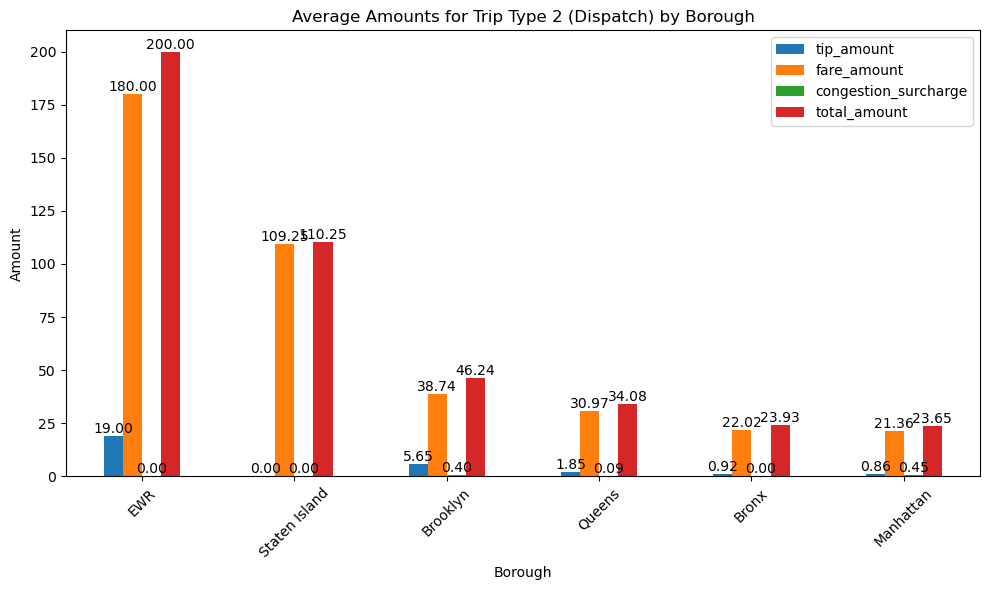

In [119]:
# import matplotlib.pyplot as plt

# Set up the figure and axis
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plotting the bars
bars = avg_amounts_trip_type_2_sorted.plot(kind='bar', x='borough', y=['tip_amount', 'fare_amount', 'congestion_surcharge', 'total_amount'], ax=ax)

# Adding labels and title
plt.title('Average Amounts for Trip Type 2 (Dispatch) by Borough')
plt.xlabel('Borough')
plt.ylabel('Amount')
plt.xticks(rotation=45)

# Add labels with mean value on each bar
for bar in bars.patches:
    # Get the height of the bar
    height = bar.get_height()
    # Add text label with mean value rounded to 2 decimal places
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


## 10.Peningkatan pemesanan taxi pada setiap harinya berdasarkan trip type.

In [111]:
# mengekstrak hari pada kolom 'lpep_pickup_datetime', lalu membuat kolom baru
# diisikan dengan nama hari dari setiap transaksi
df_merge['dayname'] = df_merge['lpep_pickup_datetime'].dt.day_name()
# df_merge

In [112]:
total_pickup_by_trip_type1 = df_merge[df_merge['trip_type'] == 1].groupby(['dayname', 'trip_type'])[['lpep_pickup_datetime']].count()
# Sort the result by 'borough' in ascending order
total_pickup_by_trip_type1 = total_pickup_by_trip_type1.sort_values(by='lpep_pickup_datetime', ascending=False)
total_pickup_by_trip_type1 = total_pickup_by_trip_type1.rename(columns={'lpep_pickup_datetime': 'Total PickUp'})

total_pickup_by_trip_type2 = df_merge[df_merge['trip_type'] == 2].groupby(['dayname', 'trip_type'])[['lpep_pickup_datetime']].count()
# Sort the result by 'borough' in ascending order
total_pickup_by_trip_type2 = total_pickup_by_trip_type2.sort_values(by='lpep_pickup_datetime', ascending=False)
total_pickup_by_trip_type2 = total_pickup_by_trip_type2.rename(columns={'lpep_pickup_datetime': 'Total PickUp'})

# Display the result
print('1 = Street Hail')
display(total_pickup_by_trip_type1)
print('2 = Dispatch')
display(total_pickup_by_trip_type2)

1 = Street Hail


,,Total PickUp
dayname,trip_type,
Tuesday,1.0,11028
Thursday,1.0,10010
Friday,1.0,9774
Monday,1.0,9746
Wednesday,1.0,9678
Saturday,1.0,8260
Sunday,1.0,8040


2 = Dispatch


,,Total PickUp
dayname,trip_type,
Sunday,2.0,265
Saturday,2.0,208
Monday,2.0,191
Friday,2.0,182
Tuesday,2.0,180
Wednesday,2.0,159
Thursday,2.0,146


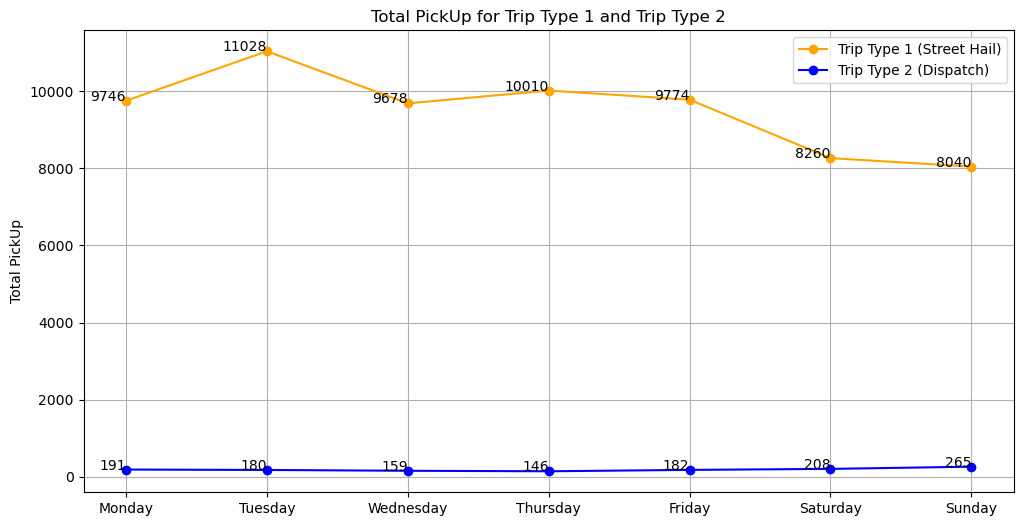

In [113]:
# Define the desired order of days
desired_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Sort and reindex total_pickup_by_trip_type1 & total_pickup_by_trip_type2
total_pickup_by_trip_type1 = total_pickup_by_trip_type1.reindex(desired_order, level=0)
total_pickup_by_trip_type2 = total_pickup_by_trip_type2.reindex(desired_order, level=0)

plt.figure(figsize=(12, 6))

# Plotting for trip type 1 (Street Hail)
plt.plot(total_pickup_by_trip_type1.index.get_level_values(0), total_pickup_by_trip_type1['Total PickUp'], marker='o', color='orange', label='Trip Type 1 (Street Hail)')
# Plotting for trip type 2 (Dispatch)
plt.plot(total_pickup_by_trip_type2.index.get_level_values(0), total_pickup_by_trip_type2['Total PickUp'], marker='o', color='blue', label='Trip Type 2 (Dispatch)')

# Adding labels to each point for trip type 1
for i, txt in enumerate(total_pickup_by_trip_type1['Total PickUp']):
    plt.text(total_pickup_by_trip_type1.index.get_level_values(0)[i], txt, str(txt), ha='right')

# Adding labels to each point for trip type 2
for i, txt in enumerate(total_pickup_by_trip_type2['Total PickUp']):
    plt.text(total_pickup_by_trip_type2.index.get_level_values(0)[i], txt, str(txt), ha='right')

plt.title('Total PickUp for Trip Type 1 and Trip Type 2')
# plt.xlabel('Dayname')
plt.ylabel('Total PickUp')
plt.legend()
plt.grid(True)
plt.show()


#### Penjelasan :
* Total pickup pada trip type street hail berdasarkan hari:
  <br>1.`Monday` sebesar `9746`
  <br>2.`Tuesday` sebesar `11028`
  <br>3.`Wednesday` sebesar `9678`
  <br>4.`Thursday` sebesar `10010`
  <br>5.`Friday` sebesar `9774`
  <br>6.`Saturday` sebesar `8260`
  <br>7.`Sunday` sebesar `8040`

* Total pickup pada trip type dispatch berdasarkan hari:
  <br>1.`Monday` sebesar `191`
  <br>2.`Tuesday` sebesar `180`
  <br>3.`Wednesday` sebesar `159`
  <br>4.`Thursday` sebesar `146`
  <br>5.`Friday` sebesar `182`
  <br>6.`Saturday` sebesar `208`
  <br>7.`Sunday` sebesar `265`


* Total pickup tertinggi pada trip type street hail di hari `Tuesday/selasa` sebesar `11028`.
* Total pickup tertinggi pada trip type dispatch di hari `Sunday/minggu` sebesar `265`.
* Terlihat perbedaan signifikan bahwa penggunaan trip type street hail banyak digunakan pada weekday/hari kerja, sedangkan trip type dispatch banyak digunakan pada weekend/hari libur. 

# Conclusion

**Number of Trip Type**
* Frekuensi trip type didominasi oleh trip type `1 = Street Hail` dengan percentage of total `98%` sendangkan trip type `2 = Dispatch` dengan percentage of total hanya `2%`.
* Kota new york dikenal sebagai kota dunia yang paling sibuk dan banyak sekali pusat distrik disana, namun pemesanan secara `street hail` paling banyak digunakan oleh pengguna TLC Trip.
* Berdasarkan Number of trip type didapat 2 borough dengan kepadatan tranportasi yang tinggi yaitu `Manhattan` dan `Queens`. Percent of total `Manhattan` dengan `Street Hail` sebesar `57.64%` dan `Queens` dengan `Street Hail` `25.41%`.
* `Dispatch` didominasi borough `Queens` dengan percent of total `1.03%` dan `Brooklyn` dengan percent of total `0.42%`. 

**Trip Distance**
* Rata rata trip distance berdasarkan street hail, `Bronx` dengan rata rata trip distance sejauh `116.03` paling tinggi, padahal sebelumnya jika dilihat dari number of street hail `Manhattan` tertinggi tetapi rata rata trip distance `Manhattan` ke-3. Menandakan bahwa karakteristik perjalanan di `Manhattan` yaitu penjelanan jarak dekat.  
* Rata rata trip distance berdasarkan dispatch,  `Brooklyn` dengan rata rata trip distance sejauh `3.63` paling tinggi, padahal sebelumnya jika dilihat dari number of street hail `Queens` tertingi tetapi rata rata trip distance `Queens` ke-3. Menandakan bahwa karakteristik perjalanan di `Queens` yaitu penjelanan jarak dekat.
* Catatan perjalan terbanyak di borough `Manhattan` dan `Queens` tetapi `rata rata trip distance` tidak terlalu tinggi dan ini memungkinkan akan mempengaruhi `total amount` yang didapat setiap perjalanan.

**Tip Amount**
* Berdasarkan trip type street hail, borough `Brooklyn` memiliki rata rata `tip amount``tertinggi` yaitu `2.73`. Jika dikorelasikan data sebelumnya rata rata trip distance `Brooklyn` yaitu `12.89` di urutan ke-2 maka mencerminkan behaviour penumpang trip type street hail di borough `Brooklyn` cukup royal kepada driver.
* Berdasarkan trip type street hail, borough `Bronx` memiliki rata rata `tip amount``terendah` yaitu `0.73`. Jika dikorelasikan data sebelumnya rata rata trip distance `Bronx` yaitu `116.03` di urutan ke-1 maka mencerminkan behaviour penumpang trip type street hail di borough `Bronx` tidak cukup royal kepada driver.
* Menghiligh borough `Queens` yang memiliki rata rata tip amount ke-3 berdasarkan street hail dan dispatch mencerminkan behaviour penumpang di `Queens` cukup royal. 

**Fare Amount**
* Pada trip type `Street hail`, borough `Staten Island` memiliki rata rata fare amount sebesar `24.35` `tertinggi` dikarenakan staten island merupakan daerah pinggiran new york namun sangat ekslusif dari segi pariwisata.
* Pada trip type `Dispatch`, borough `EWR` memiliki rata rata fare amount sebesar `180.0` `tertinggi` dikarenakan tarif dasar ke airport international ada biaya tambahan airport.
* Melihat rata rata fare amount paling rendah yaitu borough `Manhattan`. `Manhattan` banyak perjalanan dalam kota atau sekitarnya hanya melibatkan jarak pendek. Ini dapat menghasilkan fare amount yang relatif rendah meskipun tertinggi dalam frekuensi  perjalanan.

**Congestion Surcharge**
* Tiga borough dengan `rata rata congestion surcharge` tertinggi berdasarkan pemesanan trip type `street hail` di setiap `borough`:
  <br>1.`Manhattan` sebesar `1.05`.
  <br>2.`Brooklyn` sebanyak `0.37`.
  <br>3.`Queens` sebanyak `0.1`.

* Tiga borough dengan `rata rata congestion surcharge` tertinggi berdasarkan pemesanan trip type `dispatch` di setiap `borough`:
  <br>1.`Manhattan` sebesar `0.45`.
  <br>2.`Brooklyn` sebanyak `0.4`.
  <br>3.`Queens` sebanyak `0.09`.

* Melihat rata rata congestion surcharge 3 tertinggi berdasarkan street hail dan dispatch diisi oleh borough yang sama. Data tersebut mencerminkan bahwa borough tersebut merupakan daerah dengan kemacetan yang tinggi.

**Total Amount**
* Total amount tertinggi pada Trip Type street hail yaitu borough `Staten Island` sebesar `30.84`. 
* Total amount tertinggi pada Trip Type dispatch yaitu borough `EWR` sebesar `200.0`. 
* Melihat rata rata fare amount paling rendah yaitu borough `Manhattan` berdasarkan trip type street hail sebesar `20.61` dan dispatch sebesar `23.65` mencerminkan bahwa di Manhattan perjalanan taxi cenderung lebih murah atau kurang menghasilkan pendapatan dibandingkan dengan borough lainnya. 
* Kepadatan populasi yang tinggi di Manhattan, di mana perjalanan taxi mungkin lebih sering digunakan untuk perjalanan jarak pendek di sekitar wilayah tersebut. 
* Trip type `street hail` lebih umum digunakan untuk perjalanan jarak pendek di sekitar wilayah Manhattan. 
* Ini menunjukkan bahwa orang-orang cenderung menggunakan taksi secara spontan di jalanan Manhattan untuk perjalanan singkat atau tujuan terdekat.
* Disebabkan oleh kepadatan populasi yang tinggi dan infrastruktur transportasi yang padat di Manhattan, membuat penggunaan taksi untuk perjalanan jarak pendek menjadi lebih praktis dan efisien.

**Dayname**
* Total pickup tertinggi pada trip type street hail di hari `Tuesday/selasa` sebesar `11028`.
* Total pickup tertinggi pada trip type dispatch di hari `Sunday/minggu` sebesar `265`.
* Terlihat perbedaan signifikan bahwa penggunaan trip type street hail banyak digunakan pada weekday/hari kerja, sedangkan trip type dispatch banyak digunakan pada weekend/hari libur. 

# Recomendation

* **Penerapan diferensiasi tarif pada borough yang padat transportasi**
<br> Melihat tingginya pemesanan secara trip type street hail di borough manhattan sebesar 57.65% dan queens sebesar 25.41% mencerminkan 2 borough ini sangat padat transportasi , maka perlu adanya diferensiasi tarif seperti peningkatan fare amount pada borough yang padat transportasi agar menunjang kenaikan total amount pada setiap driver di borough tersebut. 
* **Meningkatkan layanan pada borough dengan persentase trip type dispatch yang tinggi**
<br> Walupun persentase antara street hail dan dispatch itu 98% banding 2%. 2% ini dapat terlihat peluang untuk meningkatkan layanan dispatch pada borough yang memiliki persentase dispatch tertinggi. Pada kasus ini borough Queens memiliki persentase dispatch tertinggi sebesar 1.038%. Jika pelayanan dispatch pada borough ini ditingkatkan maka akan menunjang pertambahan penumpang dan meningkatkan rata rata total amount yang di dapat driver. Cara ini dapat di implementasikan pada borough lainnya dengan menargetkan peningkatan penggunaan dispatch pada setiap borough di new york city.
* **Penerapan strategi bisnis berdasarkan hari**
<br> Telah terlihat pola penggunaan street hail dan dispatch dalam seminggu. Street hail rata rata digunakan pada weekday/hari kerja dan dispatch rata rata digunakan pada weekend/hari libur. Dengan mengetahui pola ini, perusahaan dapat membuat strategi bisnis berdasarkan hari, seperti promosi untuk pengguna taxi daily (target karyawan kantoran) dan promosi untuk penguna taxi dengan distance jauh , karna biasanya hari libur dipakai untuk perjalanan ke wilayah dengan distance yang jauh. Wilayah yang dapat diimplementasi dengan strategi bisnis ini seperti brooklyn yang memiliki rata rata trip ditasnce tertinggi yaitu 3.6 miles. Dengan mengetahui pola berdasarkan hari, dapat menunjang peningkatan rata rata total amount driver. 

## Perhitungan Estimasi berdasarkan recomendation

**Diferensiasi tarif pada borough yang padat transportasi**
<br>Estimasi yang akan dihitung fare amount untuk borough wilayah padat transportasi yaitu Manhattan dan Queens, berapa fare amount agar target rata-rata total amount sebesar 25.60USD

In [114]:
# Rata rata fare amount di setiap borough 
avg_fare_amount_by_borough = df_merge.groupby('borough')['fare_amount'].mean().reset_index()
avg_fare_amount_by_borough = avg_fare_amount_by_borough.sort_values(by='fare_amount', ascending=False)
display(avg_fare_amount_by_borough)

,borough,fare_amount
2,EWR,180.000000
5,Staten Island,31.429167
0,Bronx,21.784072
1,Brooklyn,21.069871
4,Queens,17.546557
3,Manhattan,14.996560


In [115]:
# Rata rata total amount di setiap borough 
avg_total_amount_by_borough = df_merge.groupby('borough')['total_amount'].mean().reset_index()
avg_total_amount_by_borough = avg_total_amount_by_borough.sort_values(by='total_amount', ascending=False)
display(avg_total_amount_by_borough)


,borough,total_amount
2,EWR,200.000000
5,Staten Island,37.455000
1,Brooklyn,26.493713
0,Bronx,24.875904
4,Queens,21.860441
3,Manhattan,20.627390


In [116]:
# Hitung total trip di setiap borough
total_trip = df_merge['lpep_pickup_datetime'].count()

# Hitung total trip di setiap borough dan simpan dalam DataFrame
total_trip_by_borough = df_merge.groupby('borough')['lpep_pickup_datetime'].count().reset_index()
total_trip_by_borough = total_trip_by_borough.sort_values(by='lpep_pickup_datetime', ascending=False)

# Hitung persentase setiap nilai dalam kolom 'lpep_pickup_datetime' terhadap total jumlahnya
total_trip_by_borough['Percentage'] = (total_trip_by_borough['lpep_pickup_datetime'] / total_trip) * 100

# Cetak hasil
print(f'Total Trip = {total_trip}')
display(total_trip_by_borough)


Total Trip = 67867


,borough,lpep_pickup_datetime,Percentage
3,Manhattan,39361,57.997259
4,Queens,17956,26.457630
1,Brooklyn,9309,13.716534
0,Bronx,1228,1.809421
5,Staten Island,12,0.017682
2,EWR,1,0.001473


In [117]:
# Diketahui :
# rata rata fare amount manhattan = 14.996560 USD
# rata rata total amount manhattan = 20.627390 USD
# total perjalanan manhtattan = 39361
# target rata rata total amount manhattan = 26.00 USD
avg_fare_amount_manhattan = avg_fare_amount_by_borough.query("borough == 'Manhattan'")['fare_amount'].values[0]
avg_fare_amount_manhattan = round(avg_fare_amount_manhattan, 2)
avg_total_amount_manhattan = avg_total_amount_by_borough.query("borough == 'Manhattan'")['total_amount'].values[0]
avg_total_amount_manhattan = round(avg_total_amount_manhattan, 2)
target_avg_total_amount_manhattan = 25.60

persentase_fare_amount = ((target_avg_total_amount_manhattan - avg_total_amount_manhattan)/avg_total_amount_manhattan) * 100
persentase_fare_amount = round(persentase_fare_amount, 2)

fare_amount_diferensiasi_manhattan = avg_fare_amount_manhattan + (1+(persentase_fare_amount/100))
fare_amount_diferensiasi_manhattan = round(fare_amount_diferensiasi_manhattan, 2)

# Persentase kenaikan fare amount
percentage_increase = persentase_fare_amount / 100

# Hitung kenaikan fare amount
fare_amount_increase = avg_fare_amount_manhattan * percentage_increase

# Hitung fare amount setelah kenaikan
fare_amount_diferensiasi_manhattan = avg_fare_amount_manhattan + fare_amount_increase
fare_amount_diferensiasi_manhattan = round(fare_amount_diferensiasi_manhattan,2)

print(f'Rata - rata fare amount manhattan \t\t:{avg_fare_amount_manhattan}')
print(f'Rata - rata total amount manhattan \t\t:{avg_total_amount_manhattan}')
print(f'Target rata - rata total amount manhattan \t:{target_avg_total_amount_manhattan}') 
print(f'Persentase fare amount \t\t\t\t:{persentase_fare_amount}')
print(f'fare amount diferensiasi manhattan \t\t:{fare_amount_diferensiasi_manhattan}')


Rata - rata fare amount manhattan 		:15.0
Rata - rata total amount manhattan 		:20.63
Target rata - rata total amount manhattan 	:25.6
Persentase fare amount 				:24.09
fare amount diferensiasi manhattan 		:18.61


#### Penjelasan :
* Pada kasus ini terdapat 2 borough yang memiliki count of trip tertinggi yaitu Manhattan sebesar 39361 dan Queens sebesar 17956. Rekomendasi untuk meningkatkan rata rata total amount di 2 borourgh ini yaitu diferensiasi tarif pada borough dengan kepadatan transportasi yang tinggi. 
* Pada estimasi ini, dilakukan estimasi pada borough Manhattan yang memiliki kepadatan paling tinggii dari borough lainnya.
* Diketahui :
    - Rata-rata fare amount manhattan 		    :15.00 USD
    - Rata-rata total amount manhattan 		    :20.63 USD
* Target rata-rata total amount manhattan 	    :25.60 USD
* Setelah dilakukan estimasi, 
    - Persentase fare amount agar memiliki rata-rata total amount di manhattan sesuai target yaitu sebesar 24.09%
    - atau rata-rata fare amount diferensiasi manhattan sebesar 18.61 USD
* Fare_amount merupakan Tarif waktu dan jarak dihitung oleh meter. Ekstra Lain-lain dan biaya tambahan. Setelah menghitung estimasi diferensiasi tarif, perusahaan dapat mempertimbangkan ekstra biaya biaya lainnya mana yang mendukung agar rata-rata fare amount di manhattan sebesar 18.61 USD berbeda dengan borough lainnya.   
* Dengan meningkatkan rata rata fare amount di borough dengan kepadatan tranportasi yang tinggi ,perusahaan juga dapat meningkatkan pelayanan pengguna taxi TLC agar kenaikan tarif searah dengan peningkatan pelayanan pengguna taxi TLC.